In [3]:
# ! pip install censusdata
# ! pip install census
# ! pip install us

In [1]:
import pandas as pd
# import censusdata
import glob
import os
from tqdm import tqdm
# import matplotlib.pyplot as plt
import random
import geopandas as gpd
from datetime import datetime
import numpy as np

tqdm.pandas()

# from matplotlib.font_manager import FontManager
# fm = FontManager()
# mat_fonts = set(f.name for f in fm.ttflist)
# print(mat_fonts)

import matplotlib.pyplot as plt

# plt.rcParams['font.sans-serif'] = ['DengXian']
plt.rcParams.update({'font.size': 16})
pd.set_option('display.max_columns', None)  # show all columns
pd.set_option("display.max_colwidth", 100)

# Load demographic data

In [2]:
# # weekly residing files
# weekly_residing_all_df = pd.read_csv(r'J:\weekly_patterns_20211211\Panel_overview_data\WeeklyPattern\weekly_home_panel_summary.csv', dtype={'census_block_group':str})
# # weekly_residing_df = weekly_residing_df.merge(sociala_variable_df, left_on='census_block_group', right_on='fips')
# weekly_residing_all_df['census_block_group'] = weekly_residing_all_df['census_block_group'].str.zfill(12)
# weekly_residing_all_df = weekly_residing_all_df.sort_values(['date_range_start', 'date_range_end'])
# weekly_residing_all_df

In [3]:
# ACS_csv = r'H:\covid_mobility_results\new_census_data\ACS_2019_5YR_BG\ACS_race_cbsa_income_2019_county_decile.csv'
# ACS_df = pd.read_csv(ACS_csv)

# YEAR = '2022'

# if YEAR > "2019":
#     acs_year = 2019
# else:
#     acs_year = YEAR
    
# social_variable_df = pd.read_csv(fr'P:\Shared drives\T5\safegraph_bias\cbg_acs_{acs_year}_county_tract.csv', dtype={'fips':str})
# social_variable_df['fips'] = social_variable_df['fips'].astype(str).str.zfill(12)
# social_variable_df.columns
# print("US population, male, female:")
# social_variable_df['totalpopulation'].sum(), social_variable_df['male'].sum(), social_variable_df['female'].sum(), len(social_variable_df)

In [3]:
def compose_variables(ACS_df):
    ACS_df['Female'] = ACS_df['female'] / ACS_df['totalpopulation']
    ACS_df['Male'] = ACS_df['male'] / ACS_df['totalpopulation']
    ACS_df['<15'] = (ACS_df['under5years'] + ACS_df['5to9years'] + \
                                        ACS_df['10to14years']) / ACS_df['totalpopulation'] 

    ACS_df['15–17'] = (ACS_df['15to17years']) / ACS_df['totalpopulation'] # ACS_df['under5years'] + ACS_df['5to9years'] + \                                     ACS_df['10to14years'] + 

    ACS_df['18–24'] = ACS_df['18to24years'] / ACS_df['totalpopulation']
    ACS_df['25–34'] = ACS_df['25to34years'] / ACS_df['totalpopulation'] 
    ACS_df['35–44'] = ACS_df['35to44years'] / ACS_df['totalpopulation'] 
    ACS_df['45–54'] = ACS_df['45to54years'] / ACS_df['totalpopulation'] 
    ACS_df['55–64'] = ACS_df['55to64years'] / ACS_df['totalpopulation'] 
    ACS_df['>65'] = (ACS_df['65to74years'] + ACS_df['75to84years'] \
                                           + ACS_df['85yearsandover']) / ACS_df['totalpopulation']

    ACS_df['White'] = ACS_df['whitealone'] / ACS_df['totalpopulation'] 
    ACS_df['Black'] = ACS_df['blackorafricanamericanalone'] / ACS_df['totalpopulation'] 
    ACS_df['Hispanic'] = ACS_df['Hispanic_or_Latino'] / ACS_df['totalpopulation'] 
    ACS_df['Asian'] = ACS_df['asianalone'] / ACS_df['totalpopulation']
    # Hispanic/Latino
    
    #  # ACS_df['population25yearsandover'] was change to  ACS_df['totalpopulation'] 
    ACS_df['NoSchool'] = ACS_df['population25yearsandoverlessthanhighschool'] / ACS_df['totalpopulation']   # ACS_df['population25yearsandover']
    ACS_df['HighSchool'] = ACS_df['population25yearsandoverhighschoolgraduateincludesequivalency'] / ACS_df['totalpopulation']    # ACS_df['population25yearsandover']
    ACS_df['NoCollege'] = (ACS_df['population25yearsandoverlessthanhighschool'] + \
                                                ACS_df['population25yearsandoverhighschoolgraduateincludesequivalency']) \
                                                / ACS_df['totalpopulation']   # ACS_df['population25yearsandover']

    ACS_df['Bachelor'] = ACS_df['population25yearsandoverbachelorsdegree'] / ACS_df['totalpopulation']    # ACS_df['population25yearsandover']
    ACS_df['Graduate'] = (ACS_df['population25yearsandovermastersdegree'] + ACS_df['population25yearsandoverprofessionalschooldegree'] + \
                                                   ACS_df['population25yearsandoverdoctoratedegree']) / ACS_df['totalpopulation'] 
      # ACS_df['population25yearsandover']
    
    
    # convert household to population
    ACS_df['household_size'] = ACS_df['totalpopulation']  / ACS_df['households']
    ACS_df['<20K'] = ACS_df['household_size'] * (ACS_df['householdslessthan10000'] + ACS_df['households10000to14999'] + \
                                                   ACS_df['households15000to19999']) / ACS_df['totalpopulation']   
    ACS_df['20K–30K'] = ACS_df['household_size'] * (ACS_df['households20000to24999'] + ACS_df['households25000to29999']) / ACS_df['totalpopulation']  
    ACS_df['30K–50K'] = ACS_df['household_size'] * (ACS_df['households30000to34999'] + ACS_df['households35000to39999'] + \
                                           ACS_df['households40000to44999'] + ACS_df['households45000to49999']) / ACS_df['totalpopulation']
    ACS_df['50K–100K'] = ACS_df['household_size'] * (ACS_df['households50000to59999'] + ACS_df['households60000to74999'] + \
                                            ACS_df['households75000to99999']) / ACS_df['totalpopulation']   # 

    ACS_df['>100K'] = ACS_df['household_size'] * (ACS_df['households100000to124999'] + ACS_df['households125000to149999'] + \
                                            ACS_df['households150000to199999'] + ACS_df['households200000ormore']) / ACS_df['totalpopulation']

    ACS_df['fips'] = ACS_df['fips'].astype(str).str.zfill(12)
    
    
    ACS_df['cbg_fips'] = ACS_df['fips'] 
    ACS_df['tract_fips'] = ACS_df['cbg_fips'].str[:11]
    ACS_df['county_fips'] = ACS_df['cbg_fips'].str[:5]
    ACS_df['state_fips'] = ACS_df['cbg_fips'].str[:2]
    
    ACS_df['nation_fips'] = 0
    ACS_df['nation_fips'] = ACS_df['nation_fips'].astype(str)
    
    ACS_df = ACS_df.replace(np.inf, np.nan)
    
    # print(ACS_df[columns].describe())
    # print(len(ACS_df))
    
    return ACS_df    

In [38]:
# load monthly or weekly device sampling data


data_dir = r'D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Safegraph_bias'
save_dir = r'D:\Research\safegraph_bias\20230916'
save_path = save_dir

os.makedirs(save_dir, exist_ok=True)

years = [2018, 2019, 2020, 2021, 2022]

columns = ['Female', 'Male',
       '<15', '15–17', '18–24', '25–34', '35–44', '45–54', '55–64', '>65',
       'White', 'Black', 'Hispanic', 'Asian', 'NoSchool', 'HighSchool',
       'NoCollege', 'Bachelor', 'Graduate', '<20K', '20K–30K', '30K–50K',
       '50K–100K', '>100K']

def load_data(year):
    # file_name = os.path.join(data_dir, str(year), f'US_monthly_home_panel_summary_{year}.csv')
    file_name = os.path.join(data_dir, '20230916', 'simulated_monthly_home_panel_summary', f'US_monthly_home_panel_summary_{year}.csv')
    try:
        residing_df = pd.read_csv(file_name, dtype={'census_block_group':str}, encoding='utf16')
    except:
        residing_df = pd.read_csv(file_name, dtype={'census_block_group':str}, encoding='utf8')
    residing_df['census_block_group'] = residing_df['census_block_group'].astype(str).str.zfill(12)
    
    residing_df['date_range_start'] = residing_df['year'].astype(str).str.zfill(4)  + residing_df['month'].astype(str).str.zfill(2) 
    residing_df['number_devices_residing'] = residing_df['number_devices_residing'].astype(int)
    
    if year > 2019:
        acs_year = 2019
    else:
        acs_year = year

    social_variable_df = pd.read_csv(os.path.join(data_dir, fr'cbg_acs_{acs_year}_county_tract_new20230929_cleaned.csv'), 
                                     dtype={'fips':str, 'tract_fips':str, 'totalpopulation':int})
    social_variable_df['fips'] = social_variable_df['fips'].astype(str).str.zfill(12)
    
    print(f"US population: {social_variable_df['totalpopulation'].sum()}, male, female:", 
          social_variable_df['female'].sum(), social_variable_df['male'].sum(), '\n')
    # social_variable_df['totalpopulation'].sum(), social_variable_df['male'].sum(), social_variable_df['female'].sum(), len(social_variable_df)
    social_variable_df = compose_variables(ACS_df=social_variable_df)
    
    # return social_variable_df
    
    fips_SafeGraph = residing_df['census_block_group'].unique()
    fips_ACS = social_variable_df['fips'].unique()
    
    print(f"FIPS count in SafeGraph：{len(fips_SafeGraph)}, in ACS: {len(fips_ACS)}", '\n')
    
    
    diff1 = sorted(set(fips_SafeGraph) - set(fips_ACS))
    # print(f"FIPS only in SafeGraph but NOT in ACS:, {len(diff1)}", diff1, '\n')
    
    # print()
    diff2 = sorted(set(fips_ACS) - set(fips_SafeGraph))
    # print(f"FIPS only in ACS but NOT in SafeGraph:, {len(diff2)}", diff2, '\n')
    discarded_ACS_df = social_variable_df[social_variable_df['fips'].isin(diff2)]
    extra_residing_df = residing_df[residing_df['census_block_group'].isin(diff1)]
    
    print(f"Removed devices only in {len(diff1)} SafeGraph FIPS: {extra_residing_df['number_devices_residing'].sum()} devices.", '\n')
    
    print(f"Removed these {len(discarded_ACS_df) } block groups, {discarded_ACS_df['totalpopulation'].sum()} people.", '\n')
    # social_variable_df = social_variable_df[~social_variable_df['fips'].isin(diff2)]
    
    print("Before merge ACS data row count:", len(residing_df), '\n')    
    residing_merged_df = residing_df.merge(social_variable_df, 
                                           left_on='census_block_group', 
                                           right_on='cbg_fips', how='inner')#.fillna(0)  # 'how' is very important to keep all devices and population !
    print("After merge ACS data row count: ", len(residing_merged_df), '\n')
    
    assert residing_merged_df['census_block_group'].isin(diff1).sum() == 0, 'The CBGs only in SafeGraph are not removed! '
    assert residing_merged_df['cbg_fips'].isin(diff2).sum() == 0, 'The CBGs only in ACS are not removed! '
   
    # print("ACS columns:")
    # print(social_variable_df.columns)

    return residing_merged_df, social_variable_df

# Note: the nan value will be ignored! 
# Note: CBGs have popultion=0 will have nan in population ratio.

# test    
year = 2022
residing_variable_df, ACS_df = load_data(year = year)
# residing_variable_df
residing_variable_df

US population: 328016242, male, female: 166551005 161465237 

FIPS count in SafeGraph：219215, in ACS: 220333 

Removed devices only in 0 SafeGraph FIPS: 0 devices. 

Removed these 1118 block groups, 3 people. 

Before merge ACS data row count: 2629960 

After merge ACS data row count:  2629960 



,year,month,census_block_group,number_devices_residing,date_range_start,fips,totalpopulation,male,female,under5years,5to9years,10to14years,15to17years,18to24years,25to34years,35to44years,45to54years,55to64years,65to74years,75to84years,85yearsandover,whitealone,blackorafricanamericanalone,americanindianandalaskanativealone,asianalone,nativehawaiianandotherpacificislanderalone,someotherracealone,twoormoreraces,Hispanic_or_Latino,population25yearsandover,population25yearsandoverlessthanhighschool,population25yearsandoverhighschoolgraduateincludesequivalency,population25yearsandoversomecollege,population25yearsandoverbachelorsdegree,population25yearsandovermastersdegree,population25yearsandoverprofessionalschooldegree,population25yearsandoverdoctoratedegree,households,householdslessthan10000,households10000to14999,households15000to19999,households20000to24999,households25000to29999,households30000to34999,households35000to39999,households40000to44999,households45000to49999,households50000to59999,households60000to74999,households75000to99999,households100000to124999,households125000to149999,households150000to199999,households200000ormore,state,state_fips,county_fips,tract_fips,Female,Male,<15,15–17,18–24,25–34,35–44,45–54,55–64,>65,White,Black,Hispanic,Asian,NoSchool,HighSchool,NoCollege,Bachelor,Graduate,household_size,<20K,20K–30K,30K–50K,50K–100K,>100K,cbg_fips,nation_fips
0,2022,1,010010201001,277,202201,010010201001,730,293,437,17,32,24,43,104,69,87,126,96,94,23,15,613,60,0,0,0,0,57,7,510,106,187,126,41,19,31,0,315,15,52,62,10,7,7,32,9,8,4,36,19,5,7,26,16,al,01,01001,01001020100,0.598630,0.401370,0.100000,0.058904,0.142466,0.094521,0.119178,0.172603,0.131507,0.180822,0.839726,0.082192,0.009589,0.0,0.145205,0.256164,0.401370,0.056164,0.068493,2.317460,0.409524,0.053968,0.177778,0.187302,0.171429,010010201001,0
1,2022,2,010010201001,384,202202,010010201001,730,293,437,17,32,24,43,104,69,87,126,96,94,23,15,613,60,0,0,0,0,57,7,510,106,187,126,41,19,31,0,315,15,52,62,10,7,7,32,9,8,4,36,19,5,7,26,16,al,01,01001,01001020100,0.598630,0.401370,0.100000,0.058904,0.142466,0.094521,0.119178,0.172603,0.131507,0.180822,0.839726,0.082192,0.009589,0.0,0.145205,0.256164,0.401370,0.056164,0.068493,2.317460,0.409524,0.053968,0.177778,0.187302,0.171429,010010201001,0
2,2022,3,010010201001,921,202203,010010201001,730,293,437,17,32,24,43,104,69,87,126,96,94,23,15,613,60,0,0,0,0,57,7,510,106,187,126,41,19,31,0,315,15,52,62,10,7,7,32,9,8,4,36,19,5,7,26,16,al,01,01001,01001020100,0.598630,0.401370,0.100000,0.058904,0.142466,0.094521,0.119178,0.172603,0.131507,0.180822,0.839726,0.082192,0.009589,0.0,0.145205,0.256164,0.401370,0.056164,0.068493,2.317460,0.409524,0.053968,0.177778,0.187302,0.171429,010010201001,0
3,2022,4,010010201001,495,202204,010010201001,730,293,437,17,32,24,43,104,69,87,126,96,94,23,15,613,60,0,0,0,0,57,7,510,106,187,126,41,19,31,0,315,15,52,62,10,7,7,32,9,8,4,36,19,5,7,26,16,al,01,01001,01001020100,0.598630,0.401370,0.100000,0.058904,0.142466,0.094521,0.119178,0.172603,0.131507,0.180822,0.839726,0.082192,0.009589,0.0,0.145205,0.256164,0.401370,0.056164,0.068493,2.317460,0.409524,0.053968,0.177778,0.187302,0.171429,010010201001,0
4,2022,5,010010201001,642,202205,010010201001,730,293,437,17,32,24,43,104,69,87,126,96,94,23,15,613,60,0,0,0,0,57,7,510,106,187,126,41,19,31,0,315,15,52,62,10,7,7,32,9,8,4,36,19,5,7,26,16,al,01,01001,01001020100,0.598630,0.401370,0.100000,0.058904,0.142466,0.094521,0.119178,0.172603,0.131507,0.180822,0.839726,0.082192,0.009589,0.0,0.145205,0.256164,0.401370,0.056164,0.068493,2.317460,0.409524,0.053968,0.177778,0.187302,0.171429,010010201001,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2629955,2022,8,721270037002,

In [64]:
pd.set_option('display.max_columns', None)

residing_variable_df

,year,month,census_block_group,number_devices_residing,date_range_start,fips,totalpopulation,male,female,under5years,5to9years,10to14years,15to17years,18to24years,25to34years,35to44years,45to54years,55to64years,65to74years,75to84years,85yearsandover,whitealone,blackorafricanamericanalone,americanindianandalaskanativealone,asianalone,nativehawaiianandotherpacificislanderalone,someotherracealone,twoormoreraces,Hispanic_or_Latino,population25yearsandover,population25yearsandoverlessthanhighschool,population25yearsandoverhighschoolgraduateincludesequivalency,population25yearsandoversomecollege,population25yearsandoverbachelorsdegree,population25yearsandovermastersdegree,population25yearsandoverprofessionalschooldegree,population25yearsandoverdoctoratedegree,households,householdslessthan10000,households10000to14999,households15000to19999,households20000to24999,households25000to29999,households30000to34999,households35000to39999,households40000to44999,households45000to49999,households50000to59999,households60000to74999,households75000to99999,households100000to124999,households125000to149999,households150000to199999,households200000ormore,state,state_fips,county_fips,tract_fips,Female,Male,<15,15–17,18–24,25–34,35–44,45–54,55–64,>65,White,Black,Hispanic,Asian,NoSchool,HighSchool,NoCollege,Bachelor,Graduate,household_size,<20K,20K–30K,30K–50K,50K–100K,>100K,cbg_fips,nation_fips
0,2018,1,010010201001,21,201801,010010201001,636,262,374,20,39,24,40,95,40,89,62,131,76,6,14,546,44,0,0,0,0,46,14,418,87,141,108,39,22,21,0,294,21,77,22,15,23,9,28,9,9,4,17,33,0,6,21,0,al,01,01001,01001020100,0.588,0.412,0.131,0.063,0.149,0.063,0.140,0.097,0.206,0.151,0.858,0.069,0.022,0.000,0.137,0.222,0.358,0.061,0.068,2.163,0.408,0.129,0.187,0.184,0.092,010010201001,0
1,2018,2,010010201001,25,201802,010010201001,636,262,374,20,39,24,40,95,40,89,62,131,76,6,14,546,44,0,0,0,0,46,14,418,87,141,108,39,22,21,0,294,21,77,22,15,23,9,28,9,9,4,17,33,0,6,21,0,al,01,01001,01001020100,0.588,0.412,0.131,0.063,0.149,0.063,0.140,0.097,0.206,0.151,0.858,0.069,0.022,0.000,0.137,0.222,0.358,0.061,0.068,2.163,0.408,0.129,0.187,0.184,0.092,010010201001,0
2,2018,3,010010201001,33,201803,010010201001,636,262,374,20,39,24,40,95,40,89,62,131,76,6,14,546,44,0,0,0,0,46,14,418,87,141,108,39,22,21,0,294,21,77,22,15,23,9,28,9,9,4,17,33,0,6,21,0,al,01,01001,01001020100,0.588,0.412,0.131,0.063,0.149,0.063,0.140,0.097,0.206,0.151,0.858,0.069,0.022,0.000,0.137,0.222,0.358,0.061,0.068,2.163,0.408,0.129,0.187,0.184,0.092,010010201001,0
3,2018,4,010010201001,38,201804,010010201001,636,262,374,20,39,24,40,95,40,89,62,131,76,6,14,546,44,0,0,0,0,46,14,418,87,141,108,39,22,21,0,294,21,77,22,15,23,9,28,9,9,4,17,33,0,6,21,0,al,01,01001,01001020100,0.588,0.412,0.131,0.063,0.149,0.063,0.140,0.097,0.206,0.151,0.858,0.069,0.022,0.000,0.137,0.222,0.358,0.061,0.068,2.163,0.408,0.129,0.187,0.184,0.092,010010201001,0
4,2018,5,010010201001,44,201805,010010201001,636,262,374,20,39,24,40,95,40,89,62,131,76,6,14,546,44,0,0,0,0,46,14,418,87,141,108,39,22,21,0,294,21,77,22,15,23,9,28,9,9,4,17,33,0,6,21,0,al,01,01001,01001020100,0.588,0.412,0.131,0.063,0.149,0.063,0.140,0.097,0.206,0.151,0.858,0.069,0.022,0.000,0.137,0.222,0.358,0.061,0.068,2.163,0.408,0.129,0.187,0.184,0.092,010010201001,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2630223,2018,12,260839801001,0,201812,260839801001,3,0,3,0,0,0,0,3,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,mi,26,26083,26083980100,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.667,0.333,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,260839801001,0
2630224,2018,7,450790013001,0,201807,450790013001,199,53,146,36,22,16

In [5]:
pd.set_option('display.max_columns', None)

ACS_df
# residing_variable_df

,fips,totalpopulation,male,female,under5years,5to9years,10to14years,15to17years,18to24years,25to34years,35to44years,45to54years,55to64years,65to74years,75to84years,85yearsandover,whitealone,blackorafricanamericanalone,americanindianandalaskanativealone,asianalone,nativehawaiianandotherpacificislanderalone,someotherracealone,twoormoreraces,Hispanic_or_Latino,population25yearsandover,population25yearsandoverlessthanhighschool,population25yearsandoverhighschoolgraduateincludesequivalency,population25yearsandoversomecollege,population25yearsandoverbachelorsdegree,population25yearsandovermastersdegree,population25yearsandoverprofessionalschooldegree,population25yearsandoverdoctoratedegree,households,householdslessthan10000,households10000to14999,households15000to19999,households20000to24999,households25000to29999,households30000to34999,households35000to39999,households40000to44999,households45000to49999,households50000to59999,households60000to74999,households75000to99999,households100000to124999,households125000to149999,households150000to199999,households200000ormore,state,state_fips,county_fips,tract_fips,Female,Male,<15,15–17,18–24,25–34,35–44,45–54,55–64,>65,White,Black,Hispanic,Asian,NoSchool,HighSchool,NoCollege,Bachelor,Graduate,household_size,<20K,20K–30K,30K–50K,50K–100K,>100K,cbg_fips,nation_fips
0,010010201001,730,293,437,17,32,24,43,104,69,87,126,96,94,23,15,613,60,0,0,0,0,57,7,510,106,187,126,41,19,31,0,315,15,52,62,10,7,7,32,9,8,4,36,19,5,7,26,16,al,01,01001,01001020100,0.598630,0.401370,0.100000,0.058904,0.142466,0.094521,0.119178,0.172603,0.131507,0.180822,0.839726,0.082192,0.009589,0.000000,0.145205,0.256164,0.401370,0.056164,0.068493,2.317460,0.409524,0.053968,0.177778,0.187302,0.171429,010010201001,0
1,010010201002,1263,614,649,98,54,123,23,152,131,159,219,172,83,28,21,1072,92,0,2,0,0,97,19,813,60,276,209,164,99,0,5,394,11,3,38,18,5,0,2,7,10,52,42,79,19,39,47,22,al,01,01001,01001020100,0.513856,0.486144,0.217736,0.018211,0.120348,0.103721,0.125891,0.173397,0.136184,0.104513,0.848773,0.072842,0.015044,0.001584,0.047506,0.218527,0.266033,0.129850,0.082344,3.205584,0.131980,0.058376,0.048223,0.439086,0.322335,010010201002,0
2,010010202001,835,393,442,52,89,37,78,36,79,133,76,91,90,68,6,276,507,0,0,21,0,31,30,543,68,309,114,46,6,0,0,318,38,72,40,0,21,6,20,15,12,18,27,28,16,5,0,0,al,01,01001,01001020200,0.529341,0.470659,0.213174,0.093413,0.043114,0.094611,0.159281,0.091018,0.108982,0.196407,0.330539,0.607186,0.035928,0.000000,0.081437,0.370060,0.451497,0.055090,0.007186,2.625786,0.471698,0.066038,0.166667,0.229560,0.066038,010010202001,0
3,010010202002,1124,665,459,47,55,42,19,101,210,166,227,137,54,18,48,483,610,0,0,0,6,25,0,860,140,337,195,138,28,17,5,370,26,11,25,3,0,46,5,36,18,54,8,62,29,31,16,0,al,01,01001,01001020200,0.408363,0.591637,0.128114,0.016904,0.089858,0.186833,0.147687,0.201957,0.121886,0.106762,0.429715,0.542705,0.000000,0.000000,0.124555,0.299822,0.424377,0.122776,0.044484,3.037838,0.167568,0.008108,0.283784,0.335135,0.205405,010010202002,0
4,010010203001,2774,1423,1351,55,258,220,80,151,505,398,336,380,216,133,42,1866,557,0,32,5,233,81,233,2010,254,736,625,204,172,0,19,1026,69,40,49,20,40,13,59,59,19,153,213,75,110,75,24,8,al,01,01001,01001020300,0.487022,0.512978,0.192141,0.028839,0.054434,0.182048,0.143475,0.121125,0.136986,0.140952,0.672675,0.200793,0.083994,0.011536,0.091565,0.265321,0.356885,0.073540,0.068854,2.703704,0.153996,0.058480,0.146199,0.429825,0.211501,010010203001,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220328,721537506011,883,480,403,48,78,120,12,79,45,105,70,120,169,24,13,719,0,0,0,0,164,0,883,546,167,152,126,84,17,0,0,237,102,14,45,19,0,0,31,7,19,0,0,0,0,0,0,0,pr,72,72153,72153750601,0.456399,0.54360

In [29]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

residing_variable_df[columns + ['household_size']].describe()

,Female,Male,<15,15–17,18–24,...,20K–30K,30K–50K,50K–100K,>100K,household_size
count,2629960.000,2629960.000,2629960.000,2629960.000,2629960.000,...,2624514.000,2624514.000,2624514.000,2624514.000,2624514.000
mean,0.509,0.491,0.178,0.037,0.090,...,0.094,0.173,0.294,0.276,2.943
std,0.066,0.066,0.080,0.028,0.089,...,0.076,0.098,0.119,0.204,10.143
min,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,1.000
25%,0.474,0.455,0.126,0.017,0.047,...,0.038,0.101,0.214,0.116,2.283
50%,0.509,0.491,0.176,0.034,0.075,...,0.080,0.165,0.295,0.231,2.608
75%,0.545,0.526,0.227,0.053,0.110,...,0.134,0.232,0.372,0.402,3.000
max,1.000,1.000,0.768,0.848,1.000,...,1.000,1.000,1.000,1.000,1710.250


In [15]:
residing_variable_df['number_devices_residing'].isna().sum()
residing_variable_df.isna().sum()

year                          0
month                         0
census_block_group            0
number_devices_residing       0
date_range_start              0
                           ... 
30K–50K                    5446
50K–100K                   5446
>100K                      5446
cbg_fips                      0
nation_fips                   0
Length: 85, dtype: int64

In [ ]:
# residing_merged_df['Female'].mean(), residing_merged_df['Asian'].mean(), residing_merged_df['White'].mean(), residing_merged_df['Black'].mean(), residing_merged_df['Hispanic'].mean(), residing_merged_df['50K–100K'].mean()

In [52]:
# residing_merged_df['Female'].mean(), residing_merged_df['Asian'].mean(), residing_merged_df['White'].mean(), residing_merged_df['Black'].mean(), residing_merged_df['Hispanic'].mean(), residing_merged_df['50K–100K'].mean()

In [80]:
# Issue: the income range cannot sum to 1
# residing_variable_df.sample(10).iloc[:, -5:].sum(axis=1)


# Compute device sampling rate

## Monthly

In [6]:
import numpy as np
def get_sampling_rate(residing_df, ACS_df, aggre_columns):
    # residing_df['date_range_start'] = residing_df['date_range_start'].astype(str).str[:10]
    aggre_columns = ['date_range_start'] + aggre_columns
    
    # device_count_total = # including have
    
    sampling_rate_df = residing_df.groupby(aggre_columns).agg(
                                      
                                      start_date=('date_range_start', 'first'), 
                                      end_date=('date_range_start', 'last'), 
                                      # period_count=('CBG_count', 'count'), 
                                      CBG_count=('totalpopulation', 'count'), 
                                      fips=(aggre_columns[-1], 'first'), 
                                      device_count=('number_devices_residing', 'sum'), 
                                      population=('totalpopulation', 'sum'), 
                                      year=('year', 'first'),
                                      aggre_column_value=(aggre_columns[-1], 'first'), 
                                      # safegraph_ratio_max=('safegraph_ratio', max),
                                      # census_ratio=('census_ratio', 'mean'),
                                      # census_ratio_max=('census_ratio', max),
                                      # census_ratio_min=('census_ratio', min),
                                     )
    
    # sampling_rate_df['fips'] = 
    
    sampling_rate_df['population'] = sampling_rate_df['population'].astype(int)
    
    if aggre_columns[-1] == 'nation_fips':
        sampling_rate_df['population'] = ACS_df['totalpopulation'].sum()
        # sampling_rate_df['population'] = ACS_df['totalpopulation'].sum()
    
    sampling_rate_df['sampling_rate'] = sampling_rate_df['device_count'] / sampling_rate_df['population']
    sampling_rate_df.replace([np.inf], np.nan, inplace=True)

    return sampling_rate_df.reset_index().iloc[:, 2:]

  
def compute_sampling_rates(df, ACS_df, aggre_columns = ['nation_fips', 'state_fips', 'county_fips', 'tract_fips', 'cbg_fips']):
    df_list = []
    for c in aggre_columns:
        sampling_rate_df = get_sampling_rate(df, ACS_df, aggre_columns=[c])
        df_list.append(sampling_rate_df)
        
    df_all = pd.concat(df_list)
    
    return df_all

# test
# df_all = compute_sampling_rates(residing_variable_df, aggre_columns = ['state_fips', 'county_fips', 'tract_fips', 'cbg_fips'])
# df_all = compute_sampling_rates(df,                        aggre_columns = ['state_fips', 'county_fips', 'tract_fips', 'cbg_fips'])
df_all = compute_sampling_rates(residing_variable_df, ACS_df=ACS_df, aggre_columns = ['nation_fips', 'state_fips', 'county_fips', 'tract_fips', 'cbg_fips'])

df_all['fips_len'] = df_all['fips'].astype(str).str.len()
df_all['fips_level'] = df_all['fips_len'].astype(str)
df_all['fips_level'] = df_all['fips_level'].replace({'1': 'nation', '2':"state", '5':"county", '11': 'tract', '12':'CBG'})


# sampling_rates_csv_name = fr'P:\Shared drives\T5\safegraph_bias\sampling_rates_{year}_monthly.csv'
# df_all.to_csv(sampling_rates_csv_name, index=False)
df_all

,start_date,end_date,CBG_count,fips,device_count,population,year,aggre_column_value,sampling_rate,fips_len,fips_level
0,202201,202201,219028,0,25475631,328016242,2022,0,0.077666,1,nation
1,202202,202202,219108,0,25360183,328016242,2022,0,0.077314,1,nation
2,202203,202203,219203,0,39349432,328016242,2022,0,0.119962,1,nation
3,202204,202204,219191,0,38700963,328016242,2022,0,0.117985,1,nation
4,202205,202205,219204,0,43948205,328016242,2022,0,0.133982,1,nation
...,...,...,...,...,...,...,...,...,...,...,...
2629955,202212,202212,1,721537506011,10,883,2022,721537506011,0.011325,12,CBG
2629956,202212,202212,1,721537506012,49,2523,2022,721537506012,0.019421,12,CBG
2629957,202212,202212,1,721537506013,27,991,2022,721537506013,0.027245,12,CBG
2629958,202212,202212,1,721537506021,12,1577,2022,721537506021,0.007609,12,CBG


In [19]:
# df_all['fips_level'].value_counts()

In [18]:
# df_all.groupby(['fips_level']).mean()

## Aggregate to yearly

In [80]:
def time_aggregate(sampling_rate_df):
    
    rate_gb_df = sampling_rate_df.groupby(['year', 'fips']).agg(
                                      start_date=('start_date', 'first'), 
                                      end_date=('end_date', 'last'), 
                                      period_count=('start_date', 'count'), 
                                      CBG_count=('CBG_count', 'mean'), 
                                      device_count_mean=('device_count', 'mean'), 
                                      population=('population', 'mean'), 
                                      sampling_rate_mean=('sampling_rate', 'mean'),
                                      sampling_rate_max=('sampling_rate', 'max'),
                                      sampling_rate_min=('sampling_rate', 'min'),        
                                     )
    
    return rate_gb_df

# test
rate_gb_df = time_aggregate(df_all.iloc[:]).reset_index()# .query(" sampling_rate < 0.5 ")).reset_index()  # remove the outliers
# rate_gb_df.to_csv(r'P:\Shared drives\NJIT_T5\safegraph_bias\sampling_rates_yearly.csv', index=False)
rate_gb_df['fips_len'] = rate_gb_df['fips'].astype(str).str.len()
rate_gb_df['fips_level'] = rate_gb_df['fips_len'].astype(str)
rate_gb_df['fips_level'] = rate_gb_df['fips_level'].replace({'1':'nation', '2':"state", '5':"county", '11': 'tract', '12':'cbg'})

# rate_gb_df.to_csv(fr'P:\Shared drives\T5\safegraph_bias\sampling_rates_{year}_monthly_yearly.csv', index=False)
# 
rate_gb_df

,year,fips,start_date,end_date,period_count,CBG_count,device_count_mean,population,sampling_rate_mean,sampling_rate_max,sampling_rate_min,fips_len,fips_level
0,2018,0,201801,201812,12,219185.666667,2.340412e+07,326289971.0,0.071728,0.083992,0.051289,1,nation
1,2018,01,201801,201812,12,3431.000000,4.024978e+05,4864680.0,0.082739,0.093250,0.063284,2,state
2,2018,01001,201801,201812,12,32.000000,4.349000e+03,55200.0,0.078786,0.089764,0.055145,5,county
3,2018,01001020100,201801,201812,12,2.000000,1.511667e+02,1923.0,0.078610,0.120645,0.042642,11,tract
4,2018,010010201001,201801,201812,12,1.000000,4.758333e+01,636.0,0.074817,0.196541,0.033019,12,cbg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295778,2018,721537506012,201801,201812,12,1.000000,7.691667e+01,2432.0,0.031627,0.039885,0.016859,12,cbg
295779,2018,721537506013,201801,201812,12,1.000000,3.200000e+01,976.0,0.032787,0.044057,0.024590,12,cbg
295780,2018,72153750602,201801,201812,12,2.000000,5.066667e+01,2511.0,0.020178,0.029072,0.006372,11,tract
295781,2018,721537506021,201801,201812,12,1.000000,2.716667e+01,1707.0,0.015915,0.023433,0.006444,12,cbg


# Compute bias

In [12]:
residing_variable_df.query(" county_fips == '01037' ")

,year,month,census_block_group,number_devices_residing,date_range_start,fips,totalpopulation,male,female,under5years,5to9years,10to14years,15to17years,18to24years,25to34years,35to44years,45to54years,55to64years,65to74years,75to84years,85yearsandover,whitealone,blackorafricanamericanalone,americanindianandalaskanativealone,asianalone,nativehawaiianandotherpacificislanderalone,someotherracealone,twoormoreraces,Hispanic_or_Latino,population25yearsandover,population25yearsandoverlessthanhighschool,population25yearsandoverhighschoolgraduateincludesequivalency,population25yearsandoversomecollege,population25yearsandoverbachelorsdegree,population25yearsandovermastersdegree,population25yearsandoverprofessionalschooldegree,population25yearsandoverdoctoratedegree,households,householdslessthan10000,households10000to14999,households15000to19999,households20000to24999,households25000to29999,households30000to34999,households35000to39999,households40000to44999,households45000to49999,households50000to59999,households60000to74999,households75000to99999,households100000to124999,households125000to149999,households150000to199999,households200000ormore,state,state_fips,county_fips,tract_fips,Female,Male,<15,15–17,18–24,25–34,35–44,45–54,55–64,>65,White,Black,Hispanic,Asian,NoSchool,HighSchool,NoCollege,Bachelor,Graduate,household_size,<20K,20K–30K,30K–50K,50K–100K,>100K,cbg_fips,nation_fips
6576,2022,1,010379610001,56,202201,010379610001,507,264,243,23,74,36,15,36,32,96,46,74,43,14,18,42,465,0,0,0,0,0,0,323,89,140,66,13,15,0,0,180,27,46,16,13,4,11,23,0,7,9,11,0,0,11,0,2,al,01,01037,01037961000,0.479290,0.520710,0.262327,0.029586,0.071006,0.063116,0.189349,0.090730,0.145957,0.147929,0.08284,0.91716,0.000000,0.0,0.175542,0.276134,0.451677,0.025641,0.029586,2.816667,0.494444,0.094444,0.227778,0.111111,0.072222,010379610001,0
6577,2022,2,010379610001,64,202202,010379610001,507,264,243,23,74,36,15,36,32,96,46,74,43,14,18,42,465,0,0,0,0,0,0,323,89,140,66,13,15,0,0,180,27,46,16,13,4,11,23,0,7,9,11,0,0,11,0,2,al,01,01037,01037961000,0.479290,0.520710,0.262327,0.029586,0.071006,0.063116,0.189349,0.090730,0.145957,0.147929,0.08284,0.91716,0.000000,0.0,0.175542,0.276134,0.451677,0.025641,0.029586,2.816667,0.494444,0.094444,0.227778,0.111111,0.072222,010379610001,0
6578,2022,3,010379610001,127,202203,010379610001,507,264,243,23,74,36,15,36,32,96,46,74,43,14,18,42,465,0,0,0,0,0,0,323,89,140,66,13,15,0,0,180,27,46,16,13,4,11,23,0,7,9,11,0,0,11,0,2,al,01,01037,01037961000,0.479290,0.520710,0.262327,0.029586,0.071006,0.063116,0.189349,0.090730,0.145957,0.147929,0.08284,0.91716,0.000000,0.0,0.175542,0.276134,0.451677,0.025641,0.029586,2.816667,0.494444,0.094444,0.227778,0.111111,0.072222,010379610001,0
6579,2022,4,010379610001,74,202204,010379610001,507,264,243,23,74,36,15,36,32,96,46,74,43,14,18,42,465,0,0,0,0,0,0,323,89,140,66,13,15,0,0,180,27,46,16,13,4,11,23,0,7,9,11,0,0,11,0,2,al,01,01037,01037961000,0.479290,0.520710,0.262327,0.029586,0.071006,0.063116,0.189349,0.090730,0.145957,0.147929,0.08284,0.91716,0.000000,0.0,0.175542,0.276134,0.451677,0.025641,0.029586,2.816667,0.494444,0.094444,0.227778,0.111111,0.072222,010379610001,0
6580,2022,5,010379610001,95,202205,010379610001,507,264,243,23,74,36,15,36,32,96,46,74,43,14,18,42,465,0,0,0,0,0,0,323,89,140,66,13,15,0,0,180,27,46,16,13,4,11,23,0,7,9,11,0,0,11,0,2,al,01,01037,01037961000,0.479290,0.520710,0.262327,0.029586,0.071006,0.063116,0.189349,0.090730,0.145957,0.147929,0.08284,0.91716,0.000000,0.0,0.175542,0.276134,0.451677,0.025641,0.029586,2.816667,0.494444,0.094444,0.227778,0.111111,0.072222,010379610001,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6703,2022,8,010379612004,40,202208,010379612004,924,450,474,79

In [84]:
from tqdm import tqdm
from datetime import datetime
import os
tqdm.pandas()

columns = ['Female', 'Male',
       '<15', '15–17', '18–24', '25–34', '35–44', '45–54', '55–64', '>65',
       'White', 'Black', 'Hispanic', 'Asian', 'NoSchool', 'HighSchool',
       'NoCollege', 'Bachelor', 'Graduate', '<20K', '20K–30K', '30K–50K',
       '50K–100K', '>100K']

used_columns = ['date_range_start', 'nation_fips', 'state_fips', 'county_fips', 'tract_fips', 'number_devices_residing', 'totalpopulation'] + columns

def get_bias(df, aggre_column):

    
    df = df.dropna()
    
    aggre_total_device = df['number_devices_residing'].sum()
    # print("aggre_total_device:", aggre_total_device)
    
    aggre_total_pop = df['totalpopulation'].sum()
    # print("aggre_total_pop:", aggre_total_pop)
    
    if  aggre_column == 'nation_fips':
        aggre_total_pop = ACS_df['totalpopulation'].sum()
    
#         print(f"Use the US population {aggre_total_pop} the the naion level bias:")
    
    result_df = pd.DataFrame(columns = [ 'start_date', 'census_ratio', 'safegraph_ratio', 'CBG_count', 'device_count', 'populaion', 'safegraph_ratio_to_census', 'bias'],
                   index = columns)
    
    result_df.index.name = 'variable'

    if aggre_total_pop * aggre_total_device == 0:
        print("Warning:")
        print(f"FIPS: {df.iloc[0][aggre_column]}, population or device is zero, aggre_total_device: {aggre_total_device}, aggre_total_pop: {aggre_total_pop}, skipped!")
        return result_df.dropna()
    
    # return result_df
    for column in columns[:]:
        # print(column)
        start_date = df.iloc[0]['date_range_start'][:10] 
        
        # df[column] = df[column] / df['totalpopulation']  # population group ratio of each CBG
        
        cbg_column_devices = df['number_devices_residing'] * df[column]   # population group device count  of each CBG
        # cbg_device_ratio = cbg_column_devices.sum() / state_total_device  # aggregated population group device count / total_device

        cbg_column_pop = df[column] * df['totalpopulation']  # group population  of each CBG      

 

        if cbg_column_pop.sum() == 0:
            # print("Warning:")
            # print(f"FIPS: {df.iloc[0][aggre_column]}, start_date: {start_date}, population group: {column} is zero. aggre_total_device: {aggre_total_device}, aggre_total_pop: {aggre_total_pop}, skipped!")
            continue


        safegraph_ratio = cbg_column_devices.sum() / aggre_total_device
        census_ratio = cbg_column_pop.sum()  / aggre_total_pop
         
        result_df.loc[column]['start_date'] = start_date
        result_df.loc[column]['CBG_count'] = len(df)
        result_df.loc[column]['census_ratio'] = census_ratio
        result_df.loc[column]['safegraph_ratio'] = safegraph_ratio
        result_df.loc[column]['populaion'] = cbg_column_pop.sum()
        result_df.loc[column]['device_count'] = cbg_column_devices.sum() 
        result_df.loc[column]['safegraph_ratio_to_census'] = result_df.loc[column]['safegraph_ratio'] / result_df.loc[column]['census_ratio'] 
        result_df.loc[column]['bias'] = result_df.loc[column]['safegraph_ratio_to_census'] - 1

        # print(result_df)

        # if result_df['census_ratio'].isna().sum():

        #     print(" result_df.loc[column]['census_ratio']  :",  result_df.loc[column]['census_ratio']  )
        #     print(" result_df.loc[column]['safegraph_ratio']  :",  result_df.loc[column]['safegraph_ratio']  )
 

    return result_df.dropna()


def get_aggregated_bias(residing_df, aggre_columns):
    
    residing_df.loc[:, 'state_fips'] = residing_df['state_fips'].astype(str).str.zfill(2)
    
    residing_df['date_range_start'] = residing_df['date_range_start'].astype(str).str[:10]   # have an issue of different starting hours 
    groupby_cols = ['date_range_start'] + aggre_columns
    # return aggre_columns

    # return residing_df, residing_df

    bias_df = residing_df.sort_values('date_range_start').groupby(groupby_cols).progress_apply(get_bias, aggre_column=aggre_columns[-1])
    
    # return bias_df

    bias_df.reset_index(drop=False, inplace=True)
    # bias_df['start_date'] = bias_df['date_range_start'].astype(str).str[:10] 
    # bias_df = bias_df.drop(columns=['date_range_start'])
    
    # return aggre_columns + ['variable']

    # return bias_df, bias_df
    
    # yearly
    bias_gb_df = bias_df.groupby(aggre_columns + ['variable']).agg(
                                      start_date=('start_date', 'first'), 
                                      end_date=('start_date', 'last'), 
                                      period_count=('CBG_count', 'count'), 
                                      CBG_count=('CBG_count', 'mean'), 
                                      safegraph_ratio_mean=('safegraph_ratio', 'mean'), 
                                      safegraph_ratio_median=('safegraph_ratio', 'median'), 
                                      safegraph_ratio_min=('safegraph_ratio', 'min'), 
                                      safegraph_ratio_max=('safegraph_ratio', 'max'),
                                      census_ratio=('census_ratio', 'mean'),
                                      device_count=('device_count', 'mean'),
                                      population=('populaion', 'mean'),
                                     )


    bias_gb_df = bias_gb_df.query("census_ratio > 0")
 
    bias_gb_df['safegraph_ratio_mean_to_census'] = bias_gb_df['safegraph_ratio_mean'] / bias_gb_df['census_ratio']
    bias_gb_df['safegraph_ratio_median_to_census' ] = bias_gb_df['safegraph_ratio_median' ] / bias_gb_df['census_ratio']
    bias_gb_df['safegraph_ratio_min_to_census' ] = bias_gb_df['safegraph_ratio_min' ] / bias_gb_df['census_ratio']
    bias_gb_df['safegraph_ratio_max_to_census' ] = bias_gb_df['safegraph_ratio_max' ] / bias_gb_df['census_ratio']
        
    bias_gb_df['bias' ] = bias_gb_df['safegraph_ratio_mean_to_census' ] - 1
    bias_gb_df['bias_median' ] = bias_gb_df['safegraph_ratio_median_to_census' ] - 1
    bias_gb_df['bias_min' ] = bias_gb_df['safegraph_ratio_min_to_census' ] - 1
    bias_gb_df['bias_max' ] = bias_gb_df['safegraph_ratio_max_to_census' ] - 1
    
    bias_gb_df['CBG_count'] = bias_gb_df['CBG_count'].astype(int)
    
    bias_gb_df = bias_gb_df.reset_index()
    bias_gb_df['variable'] = pd.Categorical(bias_gb_df['variable'], categories=columns, ordered=True)

    bias_gb_df = bias_gb_df.sort_values(aggre_columns + ['variable']) #   sort

  
    return bias_gb_df, bias_df

def compute_nation_bias():
    # save_path = r'P:\Shared drives\T5\safegraph_bias'
    new_name = os.path.join(save_dir, f'monthly_bias_nation_{year}.csv')

    aggre_columns = ['nation_fips']
    
    if  aggre_columns[-1] == 'nation_fips':
    # aggre_total_pop = ACS_df['totalpopulation'].sum()
        print(f"Use the US population {ACS_df['totalpopulation'].sum() } for the naion level bias:")

    bias_gb_df, bias_df = get_aggregated_bias(residing_df=residing_variable_df.dropna(), aggre_columns=aggre_columns[:])
    # bias_gb_df = get_aggregated_bias(residing_df=SC_residing_df[used_columns], aggre_columns=aggre_columns[:])
    bias_gb_df.to_csv(new_name, index=False)
    
    new_name = os.path.join(save_dir, f'monthly_bias_nation_{year}_time.csv')
    bias_df.to_csv(new_name, index=False)
    
    return bias_gb_df, bias_df

def compute_state_bias():
    # save_path = r'P:\Shared drives\T5\safegraph_bias'
    new_name = os.path.join(save_dir, f'monthly_bias_state_{year}.csv')
    aggre_columns = ['state_fips']

    # bias_gb_df = get_aggregated_bias(residing_df=SC_residing_df[used_columns], aggre_columns=aggre_columns)
    bias_gb_df, bias_df = get_aggregated_bias(residing_df=residing_variable_df[used_columns].dropna(), aggre_columns=aggre_columns)
    
    bias_gb_df.to_csv(new_name, index=False)
    
    new_name = os.path.join(save_dir, f'monthly_bias_state_{year}_time.csv')
    bias_df.to_csv(new_name, index=False)
    
    return bias_gb_df, bias_df

def compute_county_bias():
    # save_path = r'P:\Shared drives\T5\safegraph_bias'
    new_name = os.path.join(save_dir, f'monthly_bias_county_{year}.csv')

    aggre_columns = ['county_fips']
    bias_gb_df, bias_df = get_aggregated_bias(residing_df=residing_variable_df.iloc[:].dropna(), aggre_columns=aggre_columns[:])
    bias_gb_df.to_csv(new_name, index=False)
    
    new_name = os.path.join(save_dir, f'monthly_bias_county_{year}_time.csv')
    bias_df.to_csv(new_name, index=False)
    
    return bias_gb_df, bias_df


def compute_region_bias():
    # save_path = r'P:\Shared drives\T5\safegraph_bias'
     

    aggre_columns = ['region_tag']
    
    
    new_name = os.path.join(save_dir, f'monthly_bias_{region_name}_{year}.csv')

    bias_gb_df, bias_df = get_aggregated_bias(residing_df=residing_variable_df.dropna(), aggre_columns=aggre_columns[:])
    # bias_gb_df = get_aggregated_bias(residing_df=SC_residing_df[used_columns], aggre_columns=aggre_columns[:])
    bias_gb_df.to_csv(new_name, index=False)
    
    new_name = os.path.join(save_dir, f'monthly_bias_region_{region_name}_{year}_time.csv')
    
    
    bias_df.to_csv(new_name, index=False)
    
    return bias_gb_df, bias_df

# Not used! 
# def compute_tract_bias():
#     save_path = r'P:\Shared drives\T5\safegraph_bias'
#     # new_name = os.path.join(save_path, f'monthly_bias_tract_{YEAR}.csv')

#     aggre_columns = ['state_fips', 'county_fips', 'tract_fips']
#     bias_gb_df, bias_df = get_aggregated_bias(residing_df=residing_variable_df[used_columns].dropna(), aggre_columns=aggre_columns[:])
#     # bias_gb_df = get_aggregated_bias(residing_df=SC_residing_df.iloc[:1000], aggre_columns=aggre_columns[:])
    
#     bias_gb_df.to_csv(new_name, index=False)
    
#     # new_name = os.path.join(save_path, f'monthly_bias_tract_{YEAR}_time.csv')
#     bias_df.to_csv(new_name, index=False)
    
#     return bias_gb_df, bias_df
# bias_gb_df, bias_df = compute_tract_bias()

# YEAR = year

# bias_gb_df, bias_df = compute_nation_bias()
# bias_gb_df, bias_df = compute_state_bias()
# bias_gb_df, bias_df = compute_county_bias()
# bias_gb_df, bias_df = compute_region_bias()


bias_df

,date_range_start,county_fips,variable,start_date,census_ratio,safegraph_ratio,CBG_count,device_count,populaion,safegraph_ratio_to_census,bias
0,202201,01001,Female,202201,0.513651,0.515817,32,3650.434386,28446.0,1.004216,0.004216
1,202201,01001,Male,202201,0.486349,0.484183,32,3426.565614,26934.0,0.995547,-0.004453
2,202201,01001,<15,202201,0.191965,0.188229,32,1332.095089,10631.0,0.980539,-0.019461
3,202201,01001,15–17,202201,0.046479,0.047043,32,332.924262,2574.0,1.01214,0.01214
4,202201,01001,18–24,202201,0.086818,0.08917,32,631.0553,4808.0,1.027086,0.027086
...,...,...,...,...,...,...,...,...,...,...,...
922793,202212,72153,<20K,202212,0.589724,0.553201,27,289.877068,20458.106446,0.938067,-0.061933
922794,202212,72153,20K–30K,202212,0.150658,0.164367,27,86.128475,5226.470925,1.090997,0.090997
922795,202212,72153,30K–50K,202212,0.153281,0.164135,27,86.006988,5317.476993,1.070813,0.070813
922796,202212,72153,50K–100K,202212,0.092326,0.10252,27,53.720702,3202.867078,1.110423,0.110423


In [74]:
bias_gb_df

,county_fips,variable,start_date,end_date,period_count,CBG_count,safegraph_ratio_mean,safegraph_ratio_median,safegraph_ratio_min,safegraph_ratio_max,census_ratio,device_count,population,safegraph_ratio_mean_to_census,safegraph_ratio_median_to_census,safegraph_ratio_min_to_census,safegraph_ratio_max_to_census,bias,bias_median,bias_min,bias_max
16,01025,Female,202201,202212,12,16,0.529313,0.52992,0.525884,0.531477,0.528412,913.587322,9027.333333,1.001705,1.002854,0.995217,1.0058,0.001705,0.002854,-0.004783,0.0058
20,01025,Male,202201,202212,12,16,0.470687,0.47008,0.468523,0.474116,0.471588,812.746012,8055.666667,0.998089,0.996802,0.993501,1.00536,-0.001911,-0.003198,-0.006499,0.00536
9,01025,<15,202201,202212,12,16,0.168828,0.168882,0.165968,0.172758,0.179567,291.091354,3067.333333,0.940197,0.940496,0.924266,0.962079,-0.059803,-0.059504,-0.075734,-0.037921
0,01025,15–17,202201,202212,12,16,0.043722,0.043916,0.041709,0.0455,0.044305,75.809764,756.0,0.986858,0.991219,0.941423,1.026975,-0.013142,-0.008781,-0.058577,0.026975
1,01025,18–24,202201,202212,12,16,0.089196,0.090617,0.083565,0.094263,0.090092,155.060457,1537.666667,0.99005,1.005828,0.927544,1.04629,-0.00995,0.005828,-0.072456,0.04629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,01043,<20K,202201,202212,12,59,0.190727,0.190731,0.18818,0.19464,0.192764,2108.062948,15359.693516,0.98943,0.989449,0.976217,1.009728,-0.01057,-0.010551,-0.023783,0.009728
217,01043,20K–30K,202201,202212,12,59,0.125528,0.125716,0.124068,0.12735,0.12423,1384.867847,9899.237754,1.010453,1.011963,0.998698,1.025115,0.010453,0.011963,-0.001302,0.025115
219,01043,30K–50K,202201,202212,12,59,0.226594,0.226453,0.223795,0.228696,0.229589,2500.041568,18293.738271,0.986955,0.986339,0.974764,0.996109,-0.013045,-0.013661,-0.025236,-0.003891
222,01043,50K–100K,202201,202212,12,59,0.300207,0.301286,0.295881,0.302157,0.299533,3312.172997,23867.689625,1.002249,1.005852,0.987808,1.008759,0.002249,0.005852,-0.012192,0.008759


In [ ]:
residing_df = residing_variable_df#.sample(10000)
aggre_columns = ['county_fips']

residing_df.loc[:, 'state_fips'] = residing_df['state_fips'].astype(str).str.zfill(2)

residing_df['date_range_start'] = residing_df['date_range_start'].astype(str).str[:10]   # have an issue of different starting hours 
groupby_cols = ['date_range_start'] + aggre_columns
# return aggre_columns

bias_df = residing_df.sort_values('date_range_start').groupby(groupby_cols).progress_apply(get_bias, aggre_column=aggre_columns[-1])

# return bias_df

bias_df.reset_index(drop=False, inplace=True)
# bias_df['start_date'] = bias_df['date_range_start'].astype(str).str[:10] 
# bias_df = bias_df.drop(columns=['date_range_start'])

# return aggre_columns + ['variable']

# yearly
bias_gb_df = bias_df.groupby(aggre_columns + ['variable']).agg(
                                  start_date=('start_date', 'first'), 
                                  end_date=('start_date', 'last'), 
                                  period_count=('CBG_count', 'count'), 
                                  CBG_count=('CBG_count', 'mean'), 
                                  safegraph_ratio_mean=('safegraph_ratio', 'mean'), 
                                  safegraph_ratio_median=('safegraph_ratio', 'median'), 
                                  safegraph_ratio_min=('safegraph_ratio', min), 
                                  safegraph_ratio_max=('safegraph_ratio', max),
                                  census_ratio=('census_ratio', 'mean'),
                                  device_count=('device_count', 'mean'),
                                  population=('populaion', 'mean'),
                                 )

# All code

## For a region

In [23]:
# residing_variable_df

In [24]:
# deep south: Alabama, Florida, Georgia, Louisiana, Mississippi, North Carolina, South Carolina, Tennessee, Texas
def add_region_tag(residing_variable_df):
    region_FIPSs = ['01', '12', '13', '22', '28', '37', '45', '47', '48']
    mask_ids = residing_variable_df['state_fips'].isin(region_FIPSs)
    residing_variable_df = residing_variable_df[mask_ids]
    
    residing_variable_df['region_tag'] = 'Deep South'
    
    return residing_variable_df

# add_region_tag(residing_variable_df)

In [ ]:
# for region only
for year in [2018, 2019, 2020, 2021, 2022][::-1]:
    print(year)
    if year > 2019:
        acs_year = 2019
    else:
        acs_year = year
    
    region_name = 'deep_south'

    residing_variable_df, ACS_df = load_data(year = year)
    residing_variable_df = add_region_tag(residing_variable_df)
    
    df_all = compute_sampling_rates(residing_variable_df, ACS_df=ACS_df, aggre_columns = ['region_tag'])

    df_all['fips_len'] = df_all['fips'].astype(str).str.len()
    df_all['fips_level'] = df_all['fips_len'].astype(str)
    df_all['fips_level'] = df_all['fips_level'].replace({'1': 'nation', '2':"state", '5':"county", '11': 'tract', '12':'CBG'})

    sampling_rates_csv_name = os.path.join(save_dir, fr'sampling_rates_{region_name}_{year}_monthly.csv')
    df_all.to_csv(sampling_rates_csv_name, index=False)
    
    rate_gb_df = time_aggregate(df_all.iloc[:]).reset_index()# .query(" sampling_rate < 0.5 ")).reset_index()  # remove the outliers
    # rate_gb_df.to_csv(r'P:\Shared drives\NJIT_T5\safegraph_bias\sampling_rates_yearly.csv', index=False)
    rate_gb_df['fips_len'] = rate_gb_df['fips'].astype(str).str.len()
    rate_gb_df['fips_level'] = rate_gb_df['fips_len'].astype(str)
    rate_gb_df['fips_level'] = rate_gb_df['fips_level'].replace({'1':'nation', '2':"state", '5':"county", '11': 'tract', '12':'cbg'})

    rate_gb_df.to_csv(os.path.join(save_dir, fr'sampling_rates_{region_name}_{year}_monthly_yearly.csv'), index=False)
    # 
    # bias
    
    # bias_gb_df, bias_df = compute_nation_bias()
    # bias_gb_df, bias_df = compute_state_bias()
    # bias_gb_df, bias_df = compute_county_bias()
    bias_gb_df, bias_df = compute_region_bias()


## Report

In [82]:
# df

In [2]:
import pandas as pd
df_new = pd.DataFrame()

for year in years[:]:
    print(year)
    region_name = r'deep_south'
    csv_file = os.path.join(save_dir, f'monthly_bias_{region_name}_{year}.csv')
    df = pd.read_csv(csv_file)
    
    df_new['variable'] =  df.iloc[:, 1]
    df_new[f'{year}'] = df[f'bias_median'].apply('{:.3f}'.format) + ' [' + df[f'bias_min'].apply('{:.3f}'.format).astype(str) + ', ' +  df[f'bias_max'].apply('{:.3f}'.format).astype(str)+ ']'
    # break
    # bias_df
df_new.set_index('variable', inplace=True)
    
df_new = df_new.loc[columns]
df_new.to_csv(os.path.join(save_dir, f'bias_{region_name}_2018-2022_table.csv'))    
df_new

NameError: name 'years' is not defined

In [ ]:
df_new = pd.DataFrame()
for year in years:
    # print(year)
    
    # 
    # df_new[f'{year}_mean'] = df[f'{year}_mean'].apply('{:.3f}'.format)
    # df_new[f'{year}_median'] = df[f'{year}_median']
    # if level == 'county':
    #     df_new['Urban'] = df.iloc[:, 0]
    df_new['variable'] =  df.iloc[:, 1]
    df_new[f'{year}'] = df[f'{year}_median'].apply('{:.3f}'.format) + ' [' + df[f'{year}_min'].apply('{:.3f}'.format).astype(str) + ', ' +  df[f'{year}_max'].apply('{:.3f}'.format).astype(str)+ ']'
    # df_new[f'{year}_max'] = df[f'{year}_max']

    
df_new.set_index('variable', inplace=True)
    
df_new = df_new.loc[columns]
df_new.to_csv(os.path.join(save_dir, f'violin_bias_{level}_2018-2022_table.csv'))    
df_new

In [312]:
# residing_variable_df['totalpopulation'].sum()/12
# ACS_df#['totalpopulation'].sum() 
# residing_variable_df

In [85]:
tqdm.pandas()

data_dir = r'D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Safegraph_bias'
save_dir = r'D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Safegraph_bias\20230916'
save_path = save_dir


for year in [2018, 2019, 2020, 2021, 2022][:]:
    print("Processing:", year)
    if year > 2019:
        acs_year = 2019
    else:
        acs_year = year
 

    residing_variable_df, ACS_df = load_data(year = year)
    df_all = compute_sampling_rates(residing_variable_df, ACS_df=ACS_df, aggre_columns = ['nation_fips', 'state_fips', 'county_fips', 'tract_fips', 'cbg_fips'])

    df_all['fips_len'] = df_all['fips'].astype(str).str.len()
    df_all['fips_level'] = df_all['fips_len'].astype(str)
    df_all['fips_level'] = df_all['fips_level'].replace({'1': 'nation', '2':"state", '5':"county", '11': 'tract', '12':'CBG'})

    sampling_rates_csv_name = os.path.join(save_dir, fr'sampling_rates_{year}_monthly.csv')
    df_all.to_csv(sampling_rates_csv_name, index=False)
    
    rate_gb_df = time_aggregate(df_all.iloc[:]).reset_index()# .query(" sampling_rate < 0.5 ")).reset_index()  # remove the outliers
    rate_gb_df['fips_len'] = rate_gb_df['fips'].astype(str).str.len()
    rate_gb_df['fips_level'] = rate_gb_df['fips_len'].astype(str)
    rate_gb_df['fips_level'] = rate_gb_df['fips_level'].replace({'1':'nation', '2':"state", '5':"county", '11': 'tract', '12':'cbg'})

    rate_gb_df.to_csv(os.path.join(save_dir, fr'sampling_rates_{year}_monthly_yearly.csv'), index=False)
 
    
    bias_gb_df, bias_df = compute_nation_bias()
    bias_gb_df, bias_df = compute_state_bias()
    bias_gb_df, bias_df = compute_county_bias()
    # bias_gb_df, bias_df = compute_region_bias()

print("Done.")
rate_gb_df
# df_all

Processing: 2018
US population: 326289971, male, female: 165692916 160597055 

FIPS count in SafeGraph：219212, in ACS: 220333 

Removed devices only in 0 SafeGraph FIPS: 0 devices. 

Removed these 1121 block groups, 272 people. 

Before merge ACS data row count: 2630228 

After merge ACS data row count:  2630228 

Use the US population 326289971 for the naion level bias:


C:\Users\USER\AppData\Local\Temp\ipykernel_14564\2576668505.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residing_df['date_range_start'] = residing_df['date_range_start'].astype(str).str[:10]   # have an issue of different starting hours
100%|████████████████████████████████████████████████████████████████████████████| 38628/38628 [14:31<00:00, 44.32it/s]


Processing: 2019
US population: 328016242, male, female: 166551005 161465237 

FIPS count in SafeGraph：219213, in ACS: 220333 

Removed devices only in 0 SafeGraph FIPS: 0 devices. 

Removed these 1120 block groups, 1275 people. 

Before merge ACS data row count: 2630314 

After merge ACS data row count:  2630314 

Use the US population 328016242 for the naion level bias:


C:\Users\USER\AppData\Local\Temp\ipykernel_14564\2576668505.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residing_df['date_range_start'] = residing_df['date_range_start'].astype(str).str[:10]   # have an issue of different starting hours
 10%|███████▌                                                                     | 3778/38640 [01:23<11:46, 49.32it/s]

FIPS: 15005, population or device is zero, aggre_total_device: 0, aggre_total_pop: 66, skipped!


100%|████████████████████████████████████████████████████████████████████████████| 38640/38640 [14:32<00:00, 44.30it/s]


Processing: 2020
US population: 328016242, male, female: 166551005 161465237 

FIPS count in SafeGraph：219214, in ACS: 220333 

Removed devices only in 0 SafeGraph FIPS: 0 devices. 

Removed these 1119 block groups, 2001 people. 

Before merge ACS data row count: 2630285 

After merge ACS data row count:  2630285 

Use the US population 328016242 for the naion level bias:


C:\Users\USER\AppData\Local\Temp\ipykernel_14564\2576668505.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residing_df['date_range_start'] = residing_df['date_range_start'].astype(str).str[:10]   # have an issue of different starting hours
100%|████████████████████████████████████████████████████████████████████████████| 38640/38640 [14:58<00:00, 43.00it/s]


Processing: 2021
US population: 328016242, male, female: 166551005 161465237 

FIPS count in SafeGraph：219214, in ACS: 220333 

Removed devices only in 0 SafeGraph FIPS: 0 devices. 

Removed these 1119 block groups, 128 people. 

Before merge ACS data row count: 2628206 

After merge ACS data row count:  2628206 

Use the US population 328016242 for the naion level bias:


C:\Users\USER\AppData\Local\Temp\ipykernel_14564\2576668505.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residing_df['date_range_start'] = residing_df['date_range_start'].astype(str).str[:10]   # have an issue of different starting hours
 18%|█████████████▉                                                               | 6996/38639 [02:39<11:08, 47.30it/s]

FIPS: 15005, population or device is zero, aggre_total_device: 0, aggre_total_pop: 66, skipped!


 26%|████████████████████                                                        | 10218/38639 [03:51<09:41, 48.89it/s]

FIPS: 15005, population or device is zero, aggre_total_device: 0, aggre_total_pop: 66, skipped!


 35%|██████████████████████████▍                                                 | 13438/38639 [05:02<08:52, 47.35it/s]

FIPS: 15005, population or device is zero, aggre_total_device: 0, aggre_total_pop: 66, skipped!


 43%|████████████████████████████████▊                                           | 16656/38639 [06:12<07:32, 48.62it/s]

FIPS: 15005, population or device is zero, aggre_total_device: 0, aggre_total_pop: 66, skipped!


 51%|███████████████████████████████████████                                     | 19875/38639 [07:24<06:46, 46.15it/s]

FIPS: 15005, population or device is zero, aggre_total_device: 0, aggre_total_pop: 66, skipped!


 60%|█████████████████████████████████████████████▍                              | 23095/38639 [08:37<05:40, 45.69it/s]

FIPS: 15005, population or device is zero, aggre_total_device: 0, aggre_total_pop: 66, skipped!


100%|████████████████████████████████████████████████████████████████████████████| 38639/38639 [14:40<00:00, 43.88it/s]


Processing: 2022
US population: 328016242, male, female: 166551005 161465237 

FIPS count in SafeGraph：219215, in ACS: 220333 

Removed devices only in 0 SafeGraph FIPS: 0 devices. 

Removed these 1118 block groups, 3 people. 

Before merge ACS data row count: 2629960 

After merge ACS data row count:  2629960 

Use the US population 328016242 for the naion level bias:


C:\Users\USER\AppData\Local\Temp\ipykernel_14564\2576668505.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residing_df['date_range_start'] = residing_df['date_range_start'].astype(str).str[:10]   # have an issue of different starting hours
100%|████████████████████████████████████████████████████████████████████████████| 38640/38640 [14:22<00:00, 44.81it/s]


Done.


,year,fips,start_date,end_date,period_count,CBG_count,device_count_mean,population,sampling_rate_mean,sampling_rate_max,sampling_rate_min,fips_len,fips_level
0,2022,0,202201,202212,12,219163.333333,2.746398e+07,328016242.0,0.083728,0.133982,0.049252,1,nation
1,2022,01,202201,202212,12,3432.000000,5.857342e+05,4876250.0,0.120120,0.170521,0.080890,2,state
2,2022,01001,202201,202212,12,32.000000,7.561917e+03,55380.0,0.136546,0.190195,0.095522,5,county
3,2022,01001020100,202201,202212,12,2.000000,6.007500e+02,1993.0,0.301430,0.565981,0.143001,11,tract
4,2022,010010201001,202201,202212,12,1.000000,4.415833e+02,730.0,0.604909,1.261644,0.238356,12,cbg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295781,2022,721537506012,202201,202212,12,1.000000,3.641667e+01,2523.0,0.014434,0.026952,0.003171,12,cbg
295782,2022,721537506013,202201,202212,12,1.000000,2.600000e+01,991.0,0.026236,0.045409,0.008073,12,cbg
295783,2022,72153750602,202201,202212,12,2.000000,1.933333e+01,2225.0,0.008689,0.013933,0.002697,11,tract
295784,2022,721537506021,202201,202212,12,1.000000,1.100000e+01,1577.0,0.006975,0.012682,0.003171,12,cbg


In [53]:
# df_all
# rate_gb_df

# Tools

## Merge monthly home panel CSV files 

In [ ]:
import os
import pandas as pd



def get_all_files(data_dir, exts=['.csv'], verbose=True):
    all_files = []
    for root_dir, folders, files in os.walk(data_dir):
        # print(root_dir)
        for f in files:
            for ext in exts:
                ext_len = len(ext)
                if ext == f[-ext_len:]:
                    full_name = os.path.join(root_dir, f)
                    all_files.append(full_name)
                    
    if verbose:
        print("Found files:", len(all_files))
    return sorted(all_files)


# csv_files.pop(9)  # Error when downlaoding: 'L:\\SafeGraph_monthly_patterns_2018-2022\\2022\\09\\06\\SAFEGRAPH\\MP\\home_panel_summary.csv',  
# csv_files.pop(11)   # identical to 11-01:  'L:\\SafeGraph_monthly_patterns_2018-2022\\2022\\11\\22\\SAFEGRAPH\\MP\\home_panel_summary.csv',


# YEAR = 2018

years = [2018, 2019, 2020, 2021, 2022]
# years = [2022]

for year in years:
    
    data_dir = fr'L:\SafeGraph_monthly_patterns_2018-2022\{year}'
    
    csv_files = get_all_files(data_dir, exts=['home_panel_summary.csv'])

    
    print("Year:", year)

    df_list = []
    for f in csv_files:
        sep = '\\'  # path separate for windows 
        first_day = f.split(sep)[-4]
        if first_day != '01':
            print("Not first day data, skipped:", f)
            continue
        df = pd.read_csv(f)
        df_list.append(df)

    all_df = pd.concat(df_list)
    print("row count:", len(all_df))
    all_df.to_csv(fr'L:\SafeGraph_monthly_patterns_2018-2022\\{year}\US_monthly_home_panel_summary_{year}.csv', index=False)
all_df

## Weekly

In [435]:
# weekly residing files
weekly_residing_all_df = pd.read_csv(r'J:\weekly_patterns_20211211\Panel_overview_data\WeeklyPattern\weekly_home_panel_summary.csv', dtype={'census_block_group':str})
# weekly_residing_df = weekly_residing_df.merge(sociala_variable_df, left_on='census_block_group', right_on='fips')
weekly_residing_all_df['census_block_group'] = weekly_residing_all_df['census_block_group'].str.zfill(12)
weekly_residing_all_df = weekly_residing_all_df.sort_values(['date_range_start', 'date_range_end'])
weekly_residing_all_df

,date_range_start,date_range_end,region,iso_country_code,census_block_group,number_devices_residing,number_devices_primary_daytime
54709667,2018-01-01T00:00:00+10:00,2018-01-08T00:00:00+10:00,gu,US,660109544001,5,5
54709668,2018-01-01T00:00:00+10:00,2018-01-08T00:00:00+10:00,gu,US,660109507022,5,4
54709669,2018-01-01T00:00:00+10:00,2018-01-08T00:00:00+10:00,gu,US,660109507023,14,12
54709670,2018-01-01T00:00:00+10:00,2018-01-08T00:00:00+10:00,gu,US,660109510002,4,4
54709671,2018-01-01T00:00:00+10:00,2018-01-08T00:00:00+10:00,gu,US,660109529003,3,3
...,...,...,...,...,...,...,...
16235,2021-12-27T00:00:00-10:00,2022-01-03T00:00:00-10:00,hi,US,150090311031,41,37
59971,2021-12-27T00:00:00-10:00,2022-01-03T00:00:00-10:00,ak,US,020160001001,34,22
65799,2021-12-27T00:00:00-11:00,2022-01-03T00:00:00-11:00,as,US,600109506002,5,6
65800,2021-12-27T00:00:00-11:00,2022-01-03T00:00:00-11:00,as,US,600109509002,1,0


In [1]:
YEAR = '2018'
if YEAR > "2019":
    acs_year = '2019'
else:
    acs_year = YEAR
acs_year

'2018'

In [475]:
social_variable_df = pd.read_csv(fr'F:\USC_OneDrive\OneDrive - University of South Carolina\Research\Safegraph_bias\cbg_acs_{acs_year}_county_tract.csv', dtype={'fips':str})
social_variable_df['fips'] = social_variable_df['fips'].astype(str).str.zfill(12)
social_variable_df.columns
print("US population, male, female:")
social_variable_df['totalpopulation'].sum(), social_variable_df['male'].sum(), social_variable_df['female'].sum(), len(social_variable_df)

US population, male, female:


(327939105, 161465237, 166551005, 220333)

In [476]:
weekly_residing_year_df = weekly_residing_all_df[weekly_residing_all_df["date_range_start"].str.startswith(YEAR)]
weekly_residing_merged_df = weekly_residing_year_df.merge(social_variable_df, left_on='census_block_group', right_on='fips')
weekly_residing_merged_df

,date_range_start,date_range_end,region,iso_country_code,census_block_group,number_devices_residing,number_devices_primary_daytime,state_fips,county_fips,tract_fips,fips,state,totalpopulation,male,female,under5years,5to9years,10to14years,15to17years,18to24years,25to34years,35to44years,45to54years,55to64years,65to74years,75to84years,85yearsandover,whitealone,blackorafricanamericanalone,americanindianandalaskanativealone,asianalone,nativehawaiianandotherpacificislanderalone,someotherracealone,twoormoreraces,Hispanic_or_Latino,population25yearsandover,population25yearsandoverlessthanhighschool,population25yearsandoverhighschoolgraduateincludesequivalency,population25yearsandoversomecollege,population25yearsandoverbachelorsdegree,population25yearsandovermastersdegree,population25yearsandoverprofessionalschooldegree,population25yearsandoverdoctoratedegree,households,householdslessthan10000,households10000to14999,households15000to19999,households20000to24999,households25000to29999,households30000to34999,households35000to39999,households40000to44999,households45000to49999,households50000to59999,households60000to74999,households75000to99999,households100000to124999,households125000to149999,households150000to199999,households200000ormore
0,2021-01-04T00:00:00-04:00,2021-01-11T00:00:00-04:00,pr,US,720678204002,2,4,72,72067,72067820400,720678204002,pr,684,325,359,23,11,20,0,58,72,55,67,127,103,124,22,186,76,0,0,0,371,51,684,572,127,167,92,49,6,0,0,285,69,87,36,21,31,6,5,0,0,4,26,0,0,0,0,0
1,2021-01-11T00:00:00-04:00,2021-01-18T00:00:00-04:00,pr,US,720678204002,2,4,72,72067,72067820400,720678204002,pr,684,325,359,23,11,20,0,58,72,55,67,127,103,124,22,186,76,0,0,0,371,51,684,572,127,167,92,49,6,0,0,285,69,87,36,21,31,6,5,0,0,4,26,0,0,0,0,0
2,2021-01-18T00:00:00-04:00,2021-01-25T00:00:00-04:00,pr,US,720678204002,0,2,72,72067,72067820400,720678204002,pr,684,325,359,23,11,20,0,58,72,55,67,127,103,124,22,186,76,0,0,0,371,51,684,572,127,167,92,49,6,0,0,285,69,87,36,21,31,6,5,0,0,4,26,0,0,0,0,0
3,2021-01-25T00:00:00-04:00,2021-02-01T00:00:00-04:00,pr,US,720678204002,0,1,72,72067,72067820400,720678204002,pr,684,325,359,23,11,20,0,58,72,55,67,127,103,124,22,186,76,0,0,0,371,51,684,572,127,167,92,49,6,0,0,285,69,87,36,21,31,6,5,0,0,4,26,0,0,0,0,0
4,2021-02-01T00:00:00-04:00,2021-02-08T00:00:00-04:00,pr,US,720678204002,1,0,72,72067,72067820400,720678204002,pr,684,325,359,23,11,20,0,58,72,55,67,127,103,124,22,186,76,0,0,0,371,51,684,572,127,167,92,49,6,0,0,285,69,87,36,21,31,6,5,0,0,4,26,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11630225,2021-12-27T00:00:00-05:00,2022-01-03T00:00:00-05:00,mi,US,260139901000,1,0,26,26013,26013990100,260139901000,mi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11630226,2021-12-27T00:00:00-05:00,2022-01-03T00:00:00-05:00,ny,US,360470164000,1,0,36,36047,36047016400,360470164000,ny,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11630227,2021-12-27T00:00:00-05:00,2022-01-03T00:00:00-05:00,wi,US,550039900000,1,0,55,55003,55003990000,550039900000,wi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11630228,2021-12-27T00:00:00-06:00,2022-01-03T00:00:00-06:00,la,US,220879900000,1,0,22,22087,22087990000,220879900000,la,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [477]:
weekly_residing_merged_df['date_range_start'] = weekly_residing_merged_df['date_range_start'].astype(str).str[:10]
weekly_residing_merged_df['state_fips'] = weekly_residing_merged_df['state_fips'].astype(str).str.zfill(2)
weekly_residing_merged_df['county_fips'] = weekly_residing_merged_df['county_fips'].astype(str).str.zfill(5)
weekly_residing_merged_df['tract_fips'] = weekly_residing_merged_df['tract_fips'].astype(str).str.zfill(11)
weekly_residing_merged_df['year'] =  weekly_residing_merged_df['date_range_start'].astype(str).str[:4]
weekly_residing_merged_df.rename(columns={'fips':'cbg_fips'}, inplace=True)
weekly_residing_merged_df

,date_range_start,date_range_end,region,iso_country_code,census_block_group,number_devices_residing,number_devices_primary_daytime,state_fips,county_fips,tract_fips,cbg_fips,state,totalpopulation,male,female,under5years,5to9years,10to14years,15to17years,18to24years,25to34years,35to44years,45to54years,55to64years,65to74years,75to84years,85yearsandover,whitealone,blackorafricanamericanalone,americanindianandalaskanativealone,asianalone,nativehawaiianandotherpacificislanderalone,someotherracealone,twoormoreraces,Hispanic_or_Latino,population25yearsandover,population25yearsandoverlessthanhighschool,population25yearsandoverhighschoolgraduateincludesequivalency,population25yearsandoversomecollege,population25yearsandoverbachelorsdegree,population25yearsandovermastersdegree,population25yearsandoverprofessionalschooldegree,population25yearsandoverdoctoratedegree,households,householdslessthan10000,households10000to14999,households15000to19999,households20000to24999,households25000to29999,households30000to34999,households35000to39999,households40000to44999,households45000to49999,households50000to59999,households60000to74999,households75000to99999,households100000to124999,households125000to149999,households150000to199999,households200000ormore,year
0,2021-01-04,2021-01-11T00:00:00-04:00,pr,US,720678204002,2,4,72,72067,72067820400,720678204002,pr,684,325,359,23,11,20,0,58,72,55,67,127,103,124,22,186,76,0,0,0,371,51,684,572,127,167,92,49,6,0,0,285,69,87,36,21,31,6,5,0,0,4,26,0,0,0,0,0,2021
1,2021-01-11,2021-01-18T00:00:00-04:00,pr,US,720678204002,2,4,72,72067,72067820400,720678204002,pr,684,325,359,23,11,20,0,58,72,55,67,127,103,124,22,186,76,0,0,0,371,51,684,572,127,167,92,49,6,0,0,285,69,87,36,21,31,6,5,0,0,4,26,0,0,0,0,0,2021
2,2021-01-18,2021-01-25T00:00:00-04:00,pr,US,720678204002,0,2,72,72067,72067820400,720678204002,pr,684,325,359,23,11,20,0,58,72,55,67,127,103,124,22,186,76,0,0,0,371,51,684,572,127,167,92,49,6,0,0,285,69,87,36,21,31,6,5,0,0,4,26,0,0,0,0,0,2021
3,2021-01-25,2021-02-01T00:00:00-04:00,pr,US,720678204002,0,1,72,72067,72067820400,720678204002,pr,684,325,359,23,11,20,0,58,72,55,67,127,103,124,22,186,76,0,0,0,371,51,684,572,127,167,92,49,6,0,0,285,69,87,36,21,31,6,5,0,0,4,26,0,0,0,0,0,2021
4,2021-02-01,2021-02-08T00:00:00-04:00,pr,US,720678204002,1,0,72,72067,72067820400,720678204002,pr,684,325,359,23,11,20,0,58,72,55,67,127,103,124,22,186,76,0,0,0,371,51,684,572,127,167,92,49,6,0,0,285,69,87,36,21,31,6,5,0,0,4,26,0,0,0,0,0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11630225,2021-12-27,2022-01-03T00:00:00-05:00,mi,US,260139901000,1,0,26,26013,26013990100,260139901000,mi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021
11630226,2021-12-27,2022-01-03T00:00:00-05:00,ny,US,360470164000,1,0,36,36047,36047016400,360470164000,ny,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021
11630227,2021-12-27,2022-01-03T00:00:00-05:00,wi,US,550039900000,1,0,55,55003,55003990000,550039900000,wi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021
11630228,2021-12-27,2022-01-03T00:00:00-06:00,la,US,220879900000,1,0,22,22087,22087990000,220879900000,la,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021


In [478]:
df = weekly_residing_merged_df[weekly_residing_merged_df["date_range_start"].str.startswith(YEAR)].query("region == 'sc'")
df

,date_range_start,date_range_end,region,iso_country_code,census_block_group,number_devices_residing,number_devices_primary_daytime,state_fips,county_fips,tract_fips,cbg_fips,state,totalpopulation,male,female,under5years,5to9years,10to14years,15to17years,18to24years,25to34years,35to44years,45to54years,55to64years,65to74years,75to84years,85yearsandover,whitealone,blackorafricanamericanalone,americanindianandalaskanativealone,asianalone,nativehawaiianandotherpacificislanderalone,someotherracealone,twoormoreraces,Hispanic_or_Latino,population25yearsandover,population25yearsandoverlessthanhighschool,population25yearsandoverhighschoolgraduateincludesequivalency,population25yearsandoversomecollege,population25yearsandoverbachelorsdegree,population25yearsandovermastersdegree,population25yearsandoverprofessionalschooldegree,population25yearsandoverdoctoratedegree,households,householdslessthan10000,households10000to14999,households15000to19999,households20000to24999,households25000to29999,households30000to34999,households35000to39999,households40000to44999,households45000to49999,households50000to59999,households60000to74999,households75000to99999,households100000to124999,households125000to149999,households150000to199999,households200000ormore,year
150859,2021-01-04,2021-01-11T00:00:00-05:00,sc,US,450410003004,87,67,45,45041,45041000300,450410003004,sc,1866,829,1037,127,91,127,70,127,127,127,127,127,127,103,11,387,127,0,21,0,0,0,0,1156,127,301,127,127,46,4,3,580,67,11,51,34,21,16,47,29,10,70,108,60,39,11,4,2,2021
150860,2021-01-11,2021-01-18T00:00:00-05:00,sc,US,450410003004,83,67,45,45041,45041000300,450410003004,sc,1866,829,1037,127,91,127,70,127,127,127,127,127,127,103,11,387,127,0,21,0,0,0,0,1156,127,301,127,127,46,4,3,580,67,11,51,34,21,16,47,29,10,70,108,60,39,11,4,2,2021
150861,2021-01-18,2021-01-25T00:00:00-05:00,sc,US,450410003004,81,62,45,45041,45041000300,450410003004,sc,1866,829,1037,127,91,127,70,127,127,127,127,127,127,103,11,387,127,0,21,0,0,0,0,1156,127,301,127,127,46,4,3,580,67,11,51,34,21,16,47,29,10,70,108,60,39,11,4,2,2021
150862,2021-01-25,2021-02-01T00:00:00-05:00,sc,US,450410003004,83,65,45,45041,45041000300,450410003004,sc,1866,829,1037,127,91,127,70,127,127,127,127,127,127,103,11,387,127,0,21,0,0,0,0,1156,127,301,127,127,46,4,3,580,67,11,51,34,21,16,47,29,10,70,108,60,39,11,4,2,2021
150863,2021-02-01,2021-02-08T00:00:00-05:00,sc,US,450410003004,86,69,45,45041,45041000300,450410003004,sc,1866,829,1037,127,91,127,70,127,127,127,127,127,127,103,11,387,127,0,21,0,0,0,0,1156,127,301,127,127,46,4,3,580,67,11,51,34,21,16,47,29,10,70,108,60,39,11,4,2,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11630108,2021-10-18,2021-10-25T00:00:00-04:00,sc,US,450899708021,0,1,45,45089,45089970802,450899708021,sc,1266,1266,0,0,0,0,0,58,127,127,127,98,0,0,0,317,127,27,0,0,96,74,299,1208,127,473,127,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021
11630109,2021-10-25,2021-11-01T00:00:00-04:00,sc,US,450899708021,0,1,45,45089,45089970802,450899708021,sc,1266,1266,0,0,0,0,0,58,127,127,127,98,0,0,0,317,127,27,0,0,96,74,299,1208,127,473,127,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021
11630110,2021-11-01,2021-11-08T00:00:00-05:00,sc,US,450899708021,0,1,45,45089,45089970802,450899708021,sc,1266,1266,0,0,0,0,0,58,127,127,127,98,0,0,0,317,127,27,0,0,96,74,299,1208,127,473,127,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021
11630111,2021-11-08,2021-11-15T00:00:00-05:00,sc,US,450899708021,0,1,45,45089,45089970802,450899708021,sc,1266,1266,0,0,0,0,0,58,127,127,127,98,0,0,0,317,127,27,0,0,96,74,299,1208,127,473,127,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021


In [479]:
import numpy as np
def get_sampling_rate(residing_df, aggre_columns):
    # residing_df['date_range_start'] = residing_df['date_range_start'].astype(str).str[:10]
    aggre_columns = ['date_range_start'] + aggre_columns
    
    sampling_rate_df = residing_df.groupby(aggre_columns).agg(
                                      
                                      start_date=('date_range_start', 'first'), 
                                      end_date=('date_range_start', 'last'), 
                                      # period_count=('CBG_count', 'count'), 
                                      CBG_count=('totalpopulation', 'count'), 
                                      fips=(aggre_columns[-1], 'first'), 
                                      device_count=('number_devices_residing', 'sum'), 
                                      population=('totalpopulation', 'sum'), 
                                      year=('year', 'first'),
                                      aggre_column=(aggre_columns[-1], 'first'), 
                                      # safegraph_ratio_max=('safegraph_ratio', max),
                                      # census_ratio=('census_ratio', 'mean'),
                                      # census_ratio_max=('census_ratio', max),
                                      # census_ratio_min=('census_ratio', min),
                                     )
    
    sampling_rate_df['sampling_rate'] = sampling_rate_df['device_count'] / sampling_rate_df['population']
    sampling_rate_df.replace([np.inf], np.nan, inplace=True)

    return sampling_rate_df.reset_index().iloc[:, 2:]


def save_df(df, save_name):
    
    print("Saved.")
    

def compute_sampling_rates(df, aggre_columns = ['state_fips', 'county_fips', 'tract_fips', 'cbg_fips']):
    df_list = []
    for c in aggre_columns:
        sampling_rate_df = get_sampling_rate(df, aggre_columns=[c])
        df_list.append(sampling_rate_df)
        
    df_all = pd.concat(df_list)
    
    return df_all

df_all = compute_sampling_rates(weekly_residing_merged_df, aggre_columns = ['state_fips', 'county_fips', 'tract_fips', 'cbg_fips'])
# df_all = compute_sampling_rates(df,                        aggre_columns = ['state_fips', 'county_fips', 'tract_fips', 'cbg_fips'])

df_all['fips_len'] = df_all['fips'].astype(str).str.len()
df_all['fips_level'] = df_all['fips_len'].astype(str)
df_all['fips_level'] = df_all['fips_level'].replace({'2':"state", '5':"county", '11': 'tract', '12':'cbg'})

df_all.to_csv(fr'P:\Shared drives\NJIT_T5\safegraph_bias\sampling_rates_{YEAR}.csv', index=False)
df_all

,start_date,end_date,CBG_count,fips,device_count,population,year,aggre_column,sampling_rate,fips_len,fips_level
0,2021-01-04,2021-01-04,3438,01,394059,4876250,2021,01,0.080812,2,state
1,2021-01-04,2021-01-04,528,02,22125,733893,2021,02,0.030147,2,state
2,2021-01-04,2021-01-04,4177,04,313834,7050299,2021,04,0.044514,2,state
3,2021-01-04,2021-01-04,2147,05,217957,2999370,2021,05,0.072668,2,state
4,2021-01-04,2021-01-04,23192,06,1311949,39272874,2021,06,0.033406,2,state
...,...,...,...,...,...,...,...,...,...,...,...
11410434,2021-12-27,2021-12-27,1,721537505032,2,981,2021,721537505032,0.002039,12,cbg
11410435,2021-12-27,2021-12-27,1,721537506011,2,883,2021,721537506011,0.002265,12,cbg
11410436,2021-12-27,2021-12-27,1,721537506012,7,2523,2021,721537506012,0.002774,12,cbg
11410437,2021-12-27,2021-12-27,1,721537506013,8,991,2021,721537506013,0.008073,12,cbg


In [480]:
df_all['sampling_rate'].mean(), df_all['sampling_rate'].max(), df_all['sampling_rate'].min()

(0.0539842884694264, 362.5, 0.0)

In [481]:
def time_aggregate(sampling_rate_df):
    
    rate_gb_df = sampling_rate_df.groupby(['year', 'fips']).agg(
                                      start_date=('start_date', 'first'), 
                                      end_date=('end_date', 'last'), 
                                      period_count=('start_date', 'count'), 
                                      CBG_count=('CBG_count', 'mean'), 
                                      device_count_mean=('device_count', 'mean'), 
                                      population=('population', 'mean'), 
                                      sampling_rate_mean=('sampling_rate', 'mean'),
                                      sampling_rate_max=('sampling_rate', max),
                                      sampling_rate_min=('sampling_rate', min),        
                                     )
    
    return rate_gb_df
    
rate_gb_df = time_aggregate(df_all.iloc[:]).reset_index()
# rate_gb_df.to_csv(r'P:\Shared drives\NJIT_T5\safegraph_bias\sampling_rates_yearly.csv', index=False)
rate_gb_df['fips_len'] = rate_gb_df['fips'].astype(str).str.len()
rate_gb_df['fips_level'] = rate_gb_df['fips_len'].astype(str)
rate_gb_df['fips_level'] = rate_gb_df['fips_level'].replace({'2':"state", '5':"county", '11': 'tract', '12':'cbg'})

rate_gb_df.to_csv(fr'P:\Shared drives\NJIT_T5\safegraph_bias\sampling_rates_{YEAR}_yearly.csv', index=False)

rate_gb_df

,year,fips,start_date,end_date,period_count,CBG_count,device_count_mean,population,sampling_rate_mean,sampling_rate_max,sampling_rate_min,fips_len,fips_level
0,2021,01,2021-01-04,2021-12-27,52,3503.615385,408712.230769,4.970024e+06,0.081901,0.103577,0.075744,2,state
1,2021,01001,2021-01-04,2021-12-27,52,32.615385,5263.519231,5.644500e+04,0.092875,0.115312,0.085645,5,county
2,2021,01001020100,2021-01-04,2021-12-27,52,2.038462,242.365385,2.031327e+03,0.118482,0.176618,0.100351,11,tract
3,2021,010010201001,2021-01-04,2021-12-27,52,1.019231,111.423077,7.440385e+02,0.148209,0.275342,0.093151,12,cbg
4,2021,010010201002,2021-01-04,2021-12-27,52,1.019231,130.942308,1.287288e+03,0.101300,0.123515,0.091053,12,cbg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297408,2021,721537506012,2021-01-04,2021-12-27,49,1.020408,4.816327,2.574490e+03,0.001869,0.012287,0.000000,12,cbg
297409,2021,721537506013,2021-01-04,2021-12-27,50,1.020000,3.480000,1.010820e+03,0.003471,0.019173,0.000000,12,cbg
297410,2021,72153750602,2021-01-04,2021-12-27,45,1.488889,2.733333,1.831867e+03,0.001405,0.005393,0.000000,11,tract
297411,2021,721537506021,2021-01-04,2021-12-27,41,1.024390,1.951220,1.615463e+03,0.001206,0.005073,0.000000,12,cbg


In [482]:
rate_gb_df['sampling_rate_mean'].mean(), rate_gb_df['sampling_rate_mean'].max(), rate_gb_df['sampling_rate_mean'].min()

(0.05389302167150877, 151.57692307692307, 0.0)

In [483]:
stop

NameError: name 'stop' is not defined

## Monthly

In [3]:
# weekly residing files
residing_all_df = pd.read_csv(r'J:\monthly_patterns_20211211\Panel_overview_data\MonthlyPattern\monthly_home_panel_summary.csv', dtype={'census_block_group':str})
# weekly_residing_df = weekly_residing_df.merge(sociala_variable_df, left_on='census_block_group', right_on='fips')
residing_all_df['census_block_group'] = residing_all_df['census_block_group'].str.zfill(12)
residing_all_df['date_range_start'] = residing_all_df['year'].astype(str).str.zfill(4) + residing_all_df['month'].astype(str).str.zfill(2)
residing_all_df['date_range_end'] = residing_all_df['date_range_start'] 
residing_all_df = residing_all_df.sort_values(['date_range_start', 'date_range_end'])
residing_all_df['date_range_start'] = residing_all_df['year'].astype(str).str.zfill(4) + residing_all_df['month'].astype(str).str.zfill(2)
residing_all_df

,year,month,region,iso_country_code,census_block_group,number_devices_residing,number_devices_primary_daytime,date_range_start,date_range_end
10569887,2018,1,ak,US,021880001002,9,5,201801,201801
10569888,2018,1,ak,US,021700006011,118,103,201801,201801
10569889,2018,1,ak,US,021220010001,120,93,201801,201801
10569890,2018,1,ak,US,021220006002,45,34,201801,201801
10569891,2018,1,ak,US,020200015003,42,38,201801,201801
...,...,...,...,...,...,...,...,...,...
220201,2022,1,wy,US,560119502001,86,60,202201,202201
220202,2022,1,wy,US,560199552003,62,52,202201,202201
220203,2022,1,wy,US,560159580003,83,54,202201,202201
220204,2022,1,wy,US,560250006002,90,67,202201,202201


In [4]:
YEAR = '2021'

if YEAR > "2019":
    acs_year = '2019'
else:
    acs_year = YEAR

In [5]:
residing_df = residing_all_df[residing_all_df["date_range_start"].astype(str).str.startswith(str(YEAR))] 
residing_df['date_range_start']

2640135    202101
2640136    202101
2640137    202101
2640138    202101
2640139    202101
            ...  
439951     202112
439952     202112
439953     202112
439954     202112
439955     202112
Name: date_range_start, Length: 2640227, dtype: object

In [530]:
social_variable_df = pd.read_csv(fr'F:\USC_OneDrive\OneDrive - University of South Carolina\Research\Safegraph_bias\cbg_acs_{acs_year}_county_tract.csv', dtype={'fips':str})
social_variable_df['fips'] = social_variable_df['fips'].astype(str).str.zfill(12)
social_variable_df.columns

print("acs_year, US population, male, female:")
acs_year, social_variable_df['totalpopulation'].sum(), social_variable_df['male'].sum(), social_variable_df['female'].sum(), len(social_variable_df)

acs_year, US population, male, female:


('2019', 327939105, 161465237, 166551005, 220333)

In [531]:
residing_merged_df = residing_df.merge(social_variable_df, left_on='census_block_group', right_on='fips')
residing_merged_df

,year,month,region,iso_country_code,census_block_group,number_devices_residing,number_devices_primary_daytime,date_range_start,date_range_end,state_fips,county_fips,tract_fips,fips,state,totalpopulation,male,female,under5years,5to9years,10to14years,15to17years,18to24years,25to34years,35to44years,45to54years,55to64years,65to74years,75to84years,85yearsandover,whitealone,blackorafricanamericanalone,americanindianandalaskanativealone,asianalone,nativehawaiianandotherpacificislanderalone,someotherracealone,twoormoreraces,Hispanic_or_Latino,population25yearsandover,population25yearsandoverlessthanhighschool,population25yearsandoverhighschoolgraduateincludesequivalency,population25yearsandoversomecollege,population25yearsandoverbachelorsdegree,population25yearsandovermastersdegree,population25yearsandoverprofessionalschooldegree,population25yearsandoverdoctoratedegree,households,householdslessthan10000,households10000to14999,households15000to19999,households20000to24999,households25000to29999,households30000to34999,households35000to39999,households40000to44999,households45000to49999,households50000to59999,households60000to74999,households75000to99999,households100000to124999,households125000to149999,households150000to199999,households200000ormore
0,2021,1,ak,US,022400001002,28,22,202101,202101,2,2240,2240000100,022400001002,ak,1289,618,671,99,66,76,28,38,127,127,127,127,127,29,6,965,0,280,11,0,0,33,8,982,84,320,127,73,127,7,0,521,32,26,26,30,26,0,33,22,6,31,64,41,73,43,35,33
1,2021,2,ak,US,022400001002,15,14,202102,202102,2,2240,2240000100,022400001002,ak,1289,618,671,99,66,76,28,38,127,127,127,127,127,29,6,965,0,280,11,0,0,33,8,982,84,320,127,73,127,7,0,521,32,26,26,30,26,0,33,22,6,31,64,41,73,43,35,33
2,2021,3,ak,US,022400001002,21,21,202103,202103,2,2240,2240000100,022400001002,ak,1289,618,671,99,66,76,28,38,127,127,127,127,127,29,6,965,0,280,11,0,0,33,8,982,84,320,127,73,127,7,0,521,32,26,26,30,26,0,33,22,6,31,64,41,73,43,35,33
3,2021,4,ak,US,022400001002,26,18,202104,202104,2,2240,2240000100,022400001002,ak,1289,618,671,99,66,76,28,38,127,127,127,127,127,29,6,965,0,280,11,0,0,33,8,982,84,320,127,73,127,7,0,521,32,26,26,30,26,0,33,22,6,31,64,41,73,43,35,33
4,2021,5,ak,US,022400001002,31,22,202105,202105,2,2240,2240000100,022400001002,ak,1289,618,671,99,66,76,28,38,127,127,127,127,127,29,6,965,0,280,11,0,0,33,8,982,84,320,127,73,127,7,0,521,32,26,26,30,26,0,33,22,6,31,64,41,73,43,35,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2637927,2021,12,nc,US,370899801001,1,1,202112,202112,37,37089,37089980100,370899801001,nc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2637928,2021,12,nj,US,340297360010,1,0,202112,202112,34,34029,34029736001,340297360010,nj,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2637929,2021,12,ny,US,360850228000,1,0,202112,202112,36,36085,36085022800,360850228000,ny,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2637930,2021,12,ny,US,360850244010,1,0,202112,202112,36,36085,36085024401,360850244010,ny,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [532]:
residing_merged_df['date_range_start'] = residing_merged_df['date_range_start'].astype(str).str[:10]
residing_merged_df['state_fips'] = residing_merged_df['state_fips'].astype(str).str.zfill(2)
residing_merged_df['county_fips'] = residing_merged_df['county_fips'].astype(str).str.zfill(5)
residing_merged_df['tract_fips'] = residing_merged_df['tract_fips'].astype(str).str.zfill(11)
residing_merged_df['year'] =  residing_merged_df['date_range_start'].astype(str).str[:4]
residing_merged_df.rename(columns={'fips':'cbg_fips'}, inplace=True)
residing_merged_df

,year,month,region,iso_country_code,census_block_group,number_devices_residing,number_devices_primary_daytime,date_range_start,date_range_end,state_fips,county_fips,tract_fips,cbg_fips,state,totalpopulation,male,female,under5years,5to9years,10to14years,15to17years,18to24years,25to34years,35to44years,45to54years,55to64years,65to74years,75to84years,85yearsandover,whitealone,blackorafricanamericanalone,americanindianandalaskanativealone,asianalone,nativehawaiianandotherpacificislanderalone,someotherracealone,twoormoreraces,Hispanic_or_Latino,population25yearsandover,population25yearsandoverlessthanhighschool,population25yearsandoverhighschoolgraduateincludesequivalency,population25yearsandoversomecollege,population25yearsandoverbachelorsdegree,population25yearsandovermastersdegree,population25yearsandoverprofessionalschooldegree,population25yearsandoverdoctoratedegree,households,householdslessthan10000,households10000to14999,households15000to19999,households20000to24999,households25000to29999,households30000to34999,households35000to39999,households40000to44999,households45000to49999,households50000to59999,households60000to74999,households75000to99999,households100000to124999,households125000to149999,households150000to199999,households200000ormore
0,2021,1,ak,US,022400001002,28,22,202101,202101,02,02240,02240000100,022400001002,ak,1289,618,671,99,66,76,28,38,127,127,127,127,127,29,6,965,0,280,11,0,0,33,8,982,84,320,127,73,127,7,0,521,32,26,26,30,26,0,33,22,6,31,64,41,73,43,35,33
1,2021,2,ak,US,022400001002,15,14,202102,202102,02,02240,02240000100,022400001002,ak,1289,618,671,99,66,76,28,38,127,127,127,127,127,29,6,965,0,280,11,0,0,33,8,982,84,320,127,73,127,7,0,521,32,26,26,30,26,0,33,22,6,31,64,41,73,43,35,33
2,2021,3,ak,US,022400001002,21,21,202103,202103,02,02240,02240000100,022400001002,ak,1289,618,671,99,66,76,28,38,127,127,127,127,127,29,6,965,0,280,11,0,0,33,8,982,84,320,127,73,127,7,0,521,32,26,26,30,26,0,33,22,6,31,64,41,73,43,35,33
3,2021,4,ak,US,022400001002,26,18,202104,202104,02,02240,02240000100,022400001002,ak,1289,618,671,99,66,76,28,38,127,127,127,127,127,29,6,965,0,280,11,0,0,33,8,982,84,320,127,73,127,7,0,521,32,26,26,30,26,0,33,22,6,31,64,41,73,43,35,33
4,2021,5,ak,US,022400001002,31,22,202105,202105,02,02240,02240000100,022400001002,ak,1289,618,671,99,66,76,28,38,127,127,127,127,127,29,6,965,0,280,11,0,0,33,8,982,84,320,127,73,127,7,0,521,32,26,26,30,26,0,33,22,6,31,64,41,73,43,35,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2637927,2021,12,nc,US,370899801001,1,1,202112,202112,37,37089,37089980100,370899801001,nc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2637928,2021,12,nj,US,340297360010,1,0,202112,202112,34,34029,34029736001,340297360010,nj,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2637929,2021,12,ny,US,360850228000,1,0,202112,202112,36,36085,36085022800,360850228000,ny,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2637930,2021,12,ny,US,360850244010,1,0,202112,202112,36,36085,36085024401,360850244010,ny,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
import numpy as np
def get_sampling_rate(residing_df, aggre_columns):
    # residing_df['date_range_start'] = residing_df['date_range_start'].astype(str).str[:10]
    aggre_columns = ['date_range_start'] + aggre_columns
    
    sampling_rate_df = residing_df.groupby(aggre_columns).agg(
                                      
                                      start_date=('date_range_start', 'first'), 
                                      end_date=('date_range_start', 'last'), 
                                      # period_count=('CBG_count', 'count'), 
                                      CBG_count=('totalpopulation', 'count'), 
                                      fips=(aggre_columns[-1], 'first'), 
                                      device_count=('number_devices_residing', 'sum'), 
                                      population=('totalpopulation', 'sum'), 
                                      year=('year', 'first'),
                                      aggre_column=(aggre_columns[-1], 'first'), 
                                      # safegraph_ratio_max=('safegraph_ratio', max),
                                      # census_ratio=('census_ratio', 'mean'),
                                      # census_ratio_max=('census_ratio', max),
                                      # census_ratio_min=('census_ratio', min),
                                     )
    
    sampling_rate_df['sampling_rate'] = sampling_rate_df['device_count'] / sampling_rate_df['population']
    sampling_rate_df.replace([np.inf], np.nan, inplace=True)

    return sampling_rate_df.reset_index().iloc[:, 2:]


def save_df(df, save_name):
    
    print("Saved.")
    

def compute_sampling_rates(df, aggre_columns = ['state_fips', 'county_fips', 'tract_fips', 'cbg_fips']):
    df_list = []
    for c in aggre_columns:
        sampling_rate_df = get_sampling_rate(df, aggre_columns=[c])
        df_list.append(sampling_rate_df)
        
    df_all = pd.concat(df_list)
    
    return df_all

df_all = compute_sampling_rates(residing_merged_df, aggre_columns = ['state_fips', 'county_fips', 'tract_fips', 'cbg_fips'])
# df_all = compute_sampling_rates(df,                        aggre_columns = ['state_fips', 'county_fips', 'tract_fips', 'cbg_fips'])

df_all['fips_len'] = df_all['fips'].astype(str).str.len()
df_all['fips_level'] = df_all['fips_len'].astype(str)
df_all['fips_level'] = df_all['fips_level'].replace({'2':"state", '5':"county", '11': 'tract', '12':'cbg'})

# df_all.to_csv(fr'P:\Shared drives\NJIT_T5\safegraph_bias\sampling_rates_{YEAR}_monthly.csv', index=False)
# df_all

NameError: name 'residing_merged_df' is not defined

In [534]:
df_all['sampling_rate'].mean(), df_all['sampling_rate'].max(), df_all['sampling_rate'].min() 

(0.07502739634419049, 639.5, 0.0)

In [ ]:
def weighted_average(dataframe, value, weight):
    val = dataframe[value]
    wt = dataframe[weight]
    # print("wt.sum:", wt.sum())
    return (val * wt).sum() / wt.sum() 

In [535]:
def time_aggregate(sampling_rate_df):
    
    rate_gb_df = sampling_rate_df.groupby(['year', 'fips']).agg(
                                      start_date=('start_date', 'first'), 
                                      end_date=('end_date', 'last'), 
                                      period_count=('start_date', 'count'), 
                                      CBG_count=('CBG_count', 'mean'), 
                                      device_count_mean=('device_count', 'mean'), 
                                      population=('population', 'mean'), 
                                      sampling_rate_mean=('sampling_rate', 'mean'),
                                      sampling_rate_max=('sampling_rate', max),
                                      sampling_rate_min=('sampling_rate', min),        
                                     )
    
    return rate_gb_df
    
rate_gb_df = time_aggregate(df_all.iloc[:]).reset_index()
# rate_gb_df.to_csv(r'P:\Shared drives\NJIT_T5\safegraph_bias\sampling_rates_yearly.csv', index=False)
rate_gb_df['fips_len'] = rate_gb_df['fips'].astype(str).str.len()
rate_gb_df['fips_level'] = rate_gb_df['fips_len'].astype(str)
rate_gb_df['fips_level'] = rate_gb_df['fips_level'].replace({'2':"state", '5':"county", '11': 'tract', '12':'cbg'})

rate_gb_df.to_csv(fr'P:\Shared drives\NJIT_T5\safegraph_bias\sampling_rates_{YEAR}_monthly_yearly.csv', index=False)

rate_gb_df

,year,fips,start_date,end_date,period_count,CBG_count,device_count_mean,population,sampling_rate_mean,sampling_rate_max,sampling_rate_min,fips_len,fips_level
0,2021,01,202101,202112,12,3437.750000,485747.166667,4876250.0,0.099615,0.116666,0.093924,2,state
1,2021,01001,202101,202112,12,32.000000,6097.916667,55380.0,0.110110,0.126761,0.104153,5,county
2,2021,01001020100,202101,202112,12,2.000000,349.916667,1993.0,0.175573,0.214250,0.147015,11,tract
3,2021,010010201001,202101,202112,12,1.000000,199.083333,730.0,0.272717,0.345205,0.197260,12,cbg
4,2021,010010201002,202101,202112,12,1.000000,150.833333,1263.0,0.119425,0.138559,0.111639,12,cbg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297357,2021,721537506012,202101,202112,12,1.000000,8.916667,2523.0,0.003534,0.013872,0.000396,12,cbg
297358,2021,721537506013,202101,202112,12,1.000000,6.416667,991.0,0.006475,0.023209,0.001009,12,cbg
297359,2021,72153750602,202101,202112,12,1.833333,4.583333,2117.0,0.002091,0.006292,0.000000,11,tract
297360,2021,721537506021,202101,202112,12,1.000000,2.666667,1577.0,0.001691,0.005073,0.000000,12,cbg


In [536]:
rate_gb_df['sampling_rate_mean'].mean(), rate_gb_df['sampling_rate_mean'].max(), rate_gb_df['sampling_rate_mean'].min()

(0.07498375601505249, 270.125, 0.0)

In [537]:
stop

NameError: name 'stop' is not defined

In [ ]:
df = pd.DataFrame(columns=['C1', 'C2', "C3"])
df["C1"] = [2, 2, 2, 1, 1, 1]
df["C2"] = ["a"] * 2 + ["b"] * 2 + ["c"] * 2
df["C3"] = range(6)

df = df.groupby(['C1', 'C2']).agg(C4=('C3', 'mean'),)

df.loc[:, :]

In [ ]:
df.loc[:, ['a', 'c'], :]

In [ ]:
bias_gb_df.index.get_level_values(1)
bias_gb_df.loc[:, ['male', 'female'], :]

In [ ]:
# SC_residing_df.sort_values('date_range_start')

In [ ]:
# weekly residing files
weekly_residing_df = pd.read_csv(r'J:\weekly_patterns_20211211\Panel_overview_data\WeeklyPattern\weekly_home_panel_summary.csv')
weekly_residing_df

In [ ]:
ACS_csv = r'H:\covid_mobility_results\new_census_data\ACS_2019_5YR_BG\ACS_race_cbsa_income_2019_county_decile.csv'

ACS_df = pd.read_csv(ACS_csv)


sociala_variable_df = pd.read_csv(r'F:\USC_OneDrive\OneDrive - University of South Carolina\Research\Mobility_covid\social_variables.csv')


sociala_variable_df
sociala_variable_df['GEOID'] = sociala_variable_df['GEOID'].str[-12:]

In [ ]:
# sociala_variable_df

In [ ]:
def text2GEOID(text):
    # for state, county, tract, blockgroup level only
    county_fips = ''
    tract_fips = ''
    blockgroup_fips = ''    
    state_fips = ''
    try:
        state_fips = text.split('state:')[1][:2]
        county_fips = text.split('county:')[1][:3]
        tract_fips = text.split('tract:')[1][:6]
        blockgroup_fips = text.split('block group:')[1][:1]
        
    except Exception as e:
        print("Error in text2GEOID()", e)
        pass
    
    return state_fips + county_fips + tract_fips + blockgroup_fips
                            
# make a test
text = r'Block Group 1, Census Tract 113, Coffee County, Alabama: Summary level: 150, state:01> county:031> tract:011300> block group:1'

len(text2GEOID(text))
                            

In [ ]:
# B01001_026E: SEX BY AGE: Female: Total population -- (Estimate)

# B01001_001E: SEX BY AGE: Total: Total population -- (Estimate)

def get_census(state_fips=['45'], county_fips=[], blockgroup_fips=[], fields=['B01001_001E', 'B01001_026E']):  
    # unfinished
    
    df_list = []
    
    for state in state_fips:
        try:
            cookbg = censusdata.download('acs5', 2019,
                                         censusdata.censusgeo([('state', state), ('county', '*'), ('block group', '*')]),
                                         ['B01001_001E', 'B01001_026E'])

            index = [text2GEOID(str(t)) for t in cookbg.index]
            cookbg.index = index
            cookbg.index = cookbg.index.set_names(['FIPS'])
            cookbg = cookbg.reset_index()
            df_list.append(cookbg)
        except Exception as e:
            print("Error in get Census data in :", state, e)
            continue
        
    return pd.concat(df_list)

# make a test

cookbg = get_census(state_fips=['45'], county_fips=[], blockgroup_fips=[])
len(cookbg)

In [ ]:
cookbg['Female_ratio']#mean()

In [ ]:
# state_fips = list(states.mapping('fips', 'abbr').keys())[:-1] # the last one is none, drop it using [:-1].

# get data of SC
state_fips = ['45'] # the last one is none, drop it using [:-1]
cookbg = get_census(state_fips=state_fips, county_fips=[], blockgroup_fips=[])

cookbg['ratio_female'] = cookbg['B01001_026E'] / cookbg['B01001_001E']


len(cookbg), cookbg['ratio_female'].mean()

cookbg['ratio_female']

In [ ]:
cookbg = cookbg.merge(sociala_variable_df, left_on=['FIPS'], right_on=['GEOID'])

In [ ]:
SC_residing_df = weekly_residing_df[weekly_residing_df["date_range_start"].str.startswith('2019')].query("region == 'sc'")
SC_residing_df

In [ ]:
SC_residing_df = SC_residing_df.merge(cookbg, left_on='census_block_group', right_on='FIPS')
SC_residing_df = SC_residing_df.query('B01001_001E > 1').dropna()
SC_residing_df

In [ ]:
columns = [ 'ratio_white', 'ratio_black', 'ratio_hispanic', 'ratio_high_school', 'ratio_senior']
columns = ['ratio_female', 'ratio_white', 'ratio_black', 'ratio_hispanic', 'ratio_high_school', 'ratio_senior']


def get_bias(df):
    
    # columns = ['ratio_female', 'ratio_white', 'ratio_black', 'ratio_hispanic', 'ratio_high_school', 'ratio_senior']
    state_total_device = df['number_devices_residing'].sum()
    state_total_pop = df['popu_cbg'].sum()
    
    result_df = pd.DataFrame(columns = [ 'variable', 'start_date', 'census_ratio', 'safegraph_ratio'],
                   index = columns)
    
    for column in columns:
        start_date = df.iloc[0]['date_range_start'][:10] 
        cbg_column_devices = df['number_devices_residing'] * df[column]
        cbg_device_ratio = cbg_column_devices.sum() / state_total_device 

        cbg_column_pop = df[column] * df['popu_cbg']
        
        census_ratio = cbg_column_pop.sum() / state_total_pop
        safegraph_ratio = cbg_column_devices.sum() / state_total_device
        
        result_df.loc[column]['variable'] = column
        result_df.loc[column]['start_date'] = start_date
        result_df.loc[column]['census_ratio'] = census_ratio
        result_df.loc[column]['safegraph_ratio'] = safegraph_ratio
        
        
        # print(f"{safegraph_ratio:0.3f}, {census_ratio:.3f}")
    # print(result_df)
    return result_df
bias_df = SC_residing_df.groupby('date_range_start').apply(get_bias)
bias_df.reset_index(drop=True, inplace=True)

# bias_df = bias_df[columns]


bias_gb_df = bias_df.groupby(['variable']).agg(census_ratio_mean=('safegraph_ratio', 'mean'), 
                                  census_ratio_min=('safegraph_ratio', min), 
                                  census_ratio_max=('safegraph_ratio', max),
                                  census_ratio=('census_ratio', max),
                                 )

bias_gb_df = bias_gb_df.loc[columns]

bias_gb_df['census_ratio_mean_to_census'] = bias_gb_df['census_ratio_mean'] / bias_gb_df['census_ratio']
bias_gb_df['census_ratio_min_to_census'] = bias_gb_df['census_ratio_min'] / bias_gb_df['census_ratio']
bias_gb_df['census_ratio_max_to_census'] = bias_gb_df['census_ratio_max'] / bias_gb_df['census_ratio']

bias_gb_df.round(2)

In [ ]:
# 

In [ ]:
bias_df.reset_index(drop=True, inplace=True)

In [ ]:
SC_residing_df.columns

In [ ]:
cookbg

In [ ]:


# cookbg

In [ ]:
CENSUS_KEY = 'b12026d61228a4b0d441ae7aa93f1ea222877503'

# two packages can be use: Census (need a Census key), Censusdata (no key needed)


from census import Census
from us import states

c = Census(CENSUS_KEY)
c.acs5.get(('NAME', 'B25034_010E'),
          {'for': 'state:{}'.format(states.MD.fips)})

In [ ]:
Census.ALL

In [ ]:
# c.sf1.state_county_blockgroup('NAME', states.AK.fips, '170', Census.ALL)


## Compute adult sampling rate

In [263]:
def compose_variables(ACS_df):
    ACS_df['Female'] = ACS_df['female'] / ACS_df['totalpopulation']
    ACS_df['Male'] = ACS_df['male'] / ACS_df['totalpopulation']
    ACS_df['<15'] = (ACS_df['under5years'] + ACS_df['5to9years'] + \
                                        ACS_df['10to14years']) / ACS_df['totalpopulation'] 

    # print(len(ACS_df))
  

    ACS_df['15–17'] = (ACS_df['15to17years']) / ACS_df['totalpopulation'] # ACS_df['under5years'] + ACS_df['5to9years'] + \                                     ACS_df['10to14years'] + 

    ACS_df['18–24'] = ACS_df['18to24years'] / ACS_df['totalpopulation']
    ACS_df['25–34'] = ACS_df['25to34years'] / ACS_df['totalpopulation'] 
    ACS_df['35–44'] = ACS_df['35to44years'] / ACS_df['totalpopulation'] 
    ACS_df['45–54'] = ACS_df['45to54years'] / ACS_df['totalpopulation'] 
    ACS_df['55–64'] = ACS_df['55to64years'] / ACS_df['totalpopulation'] 
    ACS_df['>65'] = (ACS_df['65to74years'] + ACS_df['75to84years'] \
                                           + ACS_df['85yearsandover']) / ACS_df['totalpopulation']

    ACS_df['White'] = ACS_df['whitealone'] / ACS_df['totalpopulation'] 
    ACS_df['Black'] = ACS_df['blackorafricanamericanalone'] / ACS_df['totalpopulation'] 
    ACS_df['Hispanic'] = ACS_df['Hispanic_or_Latino'] / ACS_df['totalpopulation'] 
    ACS_df['Asian'] = ACS_df['asianalone'] / ACS_df['totalpopulation']
    # Hispanic/Latino
    
    #  # ACS_df['population25yearsandover'] was change to  ACS_df['totalpopulation'] 
    ACS_df['NoSchool'] = ACS_df['population25yearsandoverlessthanhighschool'] / ACS_df['totalpopulation']   # ACS_df['population25yearsandover']
    ACS_df['HighSchool'] = ACS_df['population25yearsandoverhighschoolgraduateincludesequivalency'] / ACS_df['totalpopulation']    # ACS_df['population25yearsandover']
    ACS_df['NoCollege'] = (ACS_df['population25yearsandoverlessthanhighschool'] + \
                                                ACS_df['population25yearsandoverhighschoolgraduateincludesequivalency']) \
                                                / ACS_df['totalpopulation']   # ACS_df['population25yearsandover']

    ACS_df['Bachelor'] = ACS_df['population25yearsandoverbachelorsdegree'] / ACS_df['totalpopulation']    # ACS_df['population25yearsandover']
    ACS_df['Graduate'] = (ACS_df['population25yearsandovermastersdegree'] + ACS_df['population25yearsandoverprofessionalschooldegree'] + \
                                                   ACS_df['population25yearsandoverdoctoratedegree']) / ACS_df['totalpopulation'] 
      # ACS_df['population25yearsandover']
    
    
    # convert household to population
    ACS_df['household_size'] = ACS_df['totalpopulation']  / ACS_df['households']
    ACS_df['<20K'] = ACS_df['household_size'] * (ACS_df['householdslessthan10000'] + ACS_df['households10000to14999'] + \
                                                   ACS_df['households15000to19999']) / ACS_df['totalpopulation']   
    ACS_df['20K–30K'] = ACS_df['household_size'] * (ACS_df['households20000to24999'] + ACS_df['households25000to29999']) / ACS_df['totalpopulation']  
    ACS_df['30K–50K'] = ACS_df['household_size'] * (ACS_df['households30000to34999'] + ACS_df['households35000to39999'] + \
                                           ACS_df['households40000to44999'] + ACS_df['households45000to49999']) / ACS_df['totalpopulation']
    ACS_df['50K–100K'] = ACS_df['household_size'] * (ACS_df['households50000to59999'] + ACS_df['households60000to74999'] + \
                                            ACS_df['households75000to99999']) / ACS_df['totalpopulation']   # 

    ACS_df['>100K'] = ACS_df['household_size'] * (ACS_df['households100000to124999'] + ACS_df['households125000to149999'] + \
                                            ACS_df['households150000to199999'] + ACS_df['households200000ormore']) / ACS_df['totalpopulation']

    ACS_df['fips'] = ACS_df['fips'].astype(str).str.zfill(12)
    
    
    ACS_df['cbg_fips'] = ACS_df['fips'] 
    ACS_df['tract_fips'] = ACS_df['cbg_fips'].str[:11]
    ACS_df['county_fips'] = ACS_df['cbg_fips'].str[:5]
    ACS_df['state_fips'] = ACS_df['cbg_fips'].str[:2]
    
    ACS_df['nation_fips'] = 0
    ACS_df['nation_fips'] = ACS_df['nation_fips'].astype(str)
    
    ACS_df = ACS_df.replace(np.inf, np.nan)
      
    # print(ACS_df[columns].describe())
    # print(len(ACS_df))
    return ACS_df  
    

In [264]:
(social_variable_df['<15'] * social_variable_df['totalpopulation'] ).sum()
# social_variable_df['totalpopulation'].sum()

46998274.0

In [129]:
df = pd.read_csv(os.path.join(data_dir, f'cbg_acs_{2019}_county_tract.csv'), 
                                     dtype={'fips':str, 'tract_fips':str, 'totalpopulation':int})

ACS_df =  df
ACS_df['<15'] = (ACS_df['under5years'] + ACS_df['5to9years'] + \
                                        ACS_df['10to14years']) #/ ACS_df['totalpopulation'] 

ACS_df['<15'].sum()


# df

46998274

In [133]:
ACS_df['10to14years'].sum()

16035763

In [265]:
# load monthly or weekly device sampling data


# data_dir = r'D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Safegraph_bias'
data_dir = r'D:\Research\safegraph_bias'
save_dir = r'D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Safegraph_bias\20230916'
# svae_path = save_dir

os.makedirs(save_dir, exist_ok=True)

years = [2018, 2019, 2020, 2021, 2022]   # 

columns = ['Female', 'Male',
       '<15', '15–17', '18–24', '25–34', '35–44', '45–54', '55–64', '>65',
       'White', 'Black', 'Hispanic', 'Asian', 'NoSchool', 'HighSchool',
       'NoCollege', 'Bachelor', 'Graduate', '<20K', '20K–30K', '30K–50K',
       '50K–100K', '>100K']

for year in years[:]:
    if year > 2019:
        acs_year = 2019
    else:
        acs_year = year

    print("Processing year:", year)
    df = pd.read_csv(os.path.join(data_dir, f'cbg_acs_{acs_year}_county_tract_new20230929_cleaned.csv'), 
                                     dtype={'fips':str, 'tract_fips':str, 'totalpopulation':int})
    df['fips'] = df['fips'].astype(str).str.zfill(12)
    
    social_variable_df = compose_variables(ACS_df=df)
    monthly_sampling_rate_df = pd.read_csv(os.path.join(data_dir, fr'sampling_rates_{year}_monthly.csv'),dtype={'fips':str, 'aggre_column_value':str})
    

    #   compute CBG level adult_samping_rate
    CBG_df = monthly_sampling_rate_df.merge(social_variable_df[['fips', 'totalpopulation', '<15']]).dropna()
    CBG_df = CBG_df.drop(columns=['year', 'fips_len', 'totalpopulation'])
    CBG_df['fips_level'] = 'CBG'
    CBG_df['>14_popu_count'] = CBG_df['population'] * (1 - CBG_df['<15'])
    CBG_df['adult_sampling_rate'] = CBG_df['device_count'] / CBG_df['>14_popu_count']
    

    #   compute tract level adult_samping_rate
    CBG_df['aggre_column_value'] = CBG_df['fips'].str[:11]
    tract_df = CBG_df.groupby(['start_date', 'end_date', 'aggre_column_value'], as_index=False)[['CBG_count', 'device_count', 'population', '>14_popu_count']].sum()
    tract_df['fips_level'] = 'tract'
    tract_df['fips'] = tract_df['aggre_column_value'].str[:11]
    tract_df['<15'] = tract_df['population']  - tract_df['>14_popu_count'] 
    tract_df['sampling_rate'] = tract_df['device_count']  / tract_df['population'] 
    tract_df['adult_sampling_rate'] = tract_df['device_count'] / tract_df['>14_popu_count'] 

    # # compute the county level adult_samping_rate
    
    tract_df['aggre_column_value'] = tract_df['fips'].str[:5]
    county_df = tract_df.groupby(['start_date', 'end_date', 'aggre_column_value'], as_index=False)[['CBG_count', 'device_count', 'population', '>14_popu_count']].sum()
    county_df['fips_level'] = 'county'
    county_df['fips'] = county_df['aggre_column_value'].str[:5]
    county_df['<15'] = county_df['population']  - county_df['>14_popu_count'] 
    county_df['sampling_rate'] = county_df['device_count']  / county_df['population'] 
    county_df['adult_sampling_rate'] = county_df['device_count'] / county_df['>14_popu_count'] 

    county_df['aggre_column_value'] = county_df['fips'].str[:2]
    state_df = county_df.groupby(['start_date', 'end_date', 'aggre_column_value'], as_index=False)[['CBG_count', 'device_count', 'population', '>14_popu_count']].sum()
    state_df['fips_level'] = 'state'
    state_df['fips'] = state_df['aggre_column_value'].str[:2]
    state_df['<15'] = state_df['population']  - state_df['>14_popu_count'] 
    state_df['sampling_rate'] = state_df['device_count']  / state_df['population'] 
    state_df['adult_sampling_rate'] = state_df['device_count'] / state_df['>14_popu_count'] 

    state_df['aggre_column_value'] = '0'
    nation_df = state_df.groupby(['start_date', 'end_date', 'aggre_column_value'], as_index=False)[['CBG_count', 'device_count', 'population', '>14_popu_count']].sum()
    nation_df['fips_level'] = 'nation'
    nation_df['fips'] = "0"
    nation_df['<15'] = nation_df['population']  - nation_df['>14_popu_count'] 
    nation_df['sampling_rate'] = nation_df['device_count']  / nation_df['population'] 
    nation_df['adult_sampling_rate'] = nation_df['device_count'] / nation_df['>14_popu_count'] 

    adult_sampling_rate_df = pd.concat([nation_df, state_df, county_df, tract_df, CBG_df])
            
    new_name = os.path.join(save_dir, fr'adult_sampling_rates_{year}_monthly.csv')
    adult_sampling_rate_df.to_csv(new_name, index=False)

adult_sampling_rate_df

Processing year: 2018
Processing year: 2019
Processing year: 2020
Processing year: 2021
Processing year: 2022


,start_date,end_date,aggre_column_value,CBG_count,device_count,population,>14_popu_count,fips_level,fips,<15,sampling_rate,adult_sampling_rate
0,202201,202201,0,219028,25475631,327795671,2.664671e+08,nation,0,6.132860e+07,0.077718,0.095605
1,202202,202202,0,219108,25360183,327865737,2.665252e+08,nation,0,6.134055e+07,0.077349,0.095151
2,202203,202203,0,219203,39349432,327932828,2.665812e+08,nation,0,6.135163e+07,0.119992,0.147608
3,202204,202204,0,219191,38700963,327927372,2.665768e+08,nation,0,6.135057e+07,0.118017,0.145178
4,202205,202205,0,219204,43948205,327932866,2.665811e+08,nation,0,6.135175e+07,0.134016,0.164859
...,...,...,...,...,...,...,...,...,...,...,...,...
2640099,202208,202208,72127003700,1,2,607,5.250000e+02,CBG,721270037002,1.350906e-01,0.003295,0.003810
2640100,202209,202209,72127003700,1,1,607,5.250000e+02,CBG,721270037002,1.350906e-01,0.001647,0.001905
2640101,202210,202210,72127003700,1,2,607,5.250000e+02,CBG,721270037002,1.350906e-01,0.003295,0.003810
2640102,202211,202211,72127003700,1,1,607,5.250000e+02,CBG,721270037002,1.350906e-01,0.001647,0.001905


2018 D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Safegraph_bias\20230916\adult_sampling_rates_2018_monthly.csv CBG 2620872
R squared: 0.9460933884702065
reg.coef_: [[1.18143163]]

2018 D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Safegraph_bias\20230916\adult_sampling_rates_2018_monthly.csv tract 877244
R squared: 0.9611270732418441
reg.coef_: [[1.20601748]]

2018 D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Safegraph_bias\20230916\adult_sampling_rates_2018_monthly.csv county 38628
R squared: 0.9875120526398209
reg.coef_: [[1.25705713]]

2018 D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Safegraph_bias\20230916\adult_sampling_rates_2018_monthly.csv state 624
R squared: 0.9918015671748823
reg.coef_: [[1.22452421]]
R squared: 0.9918015671748823
reg.coef_: [[1.22452421]]

2018 D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Safegraph_bias\20230

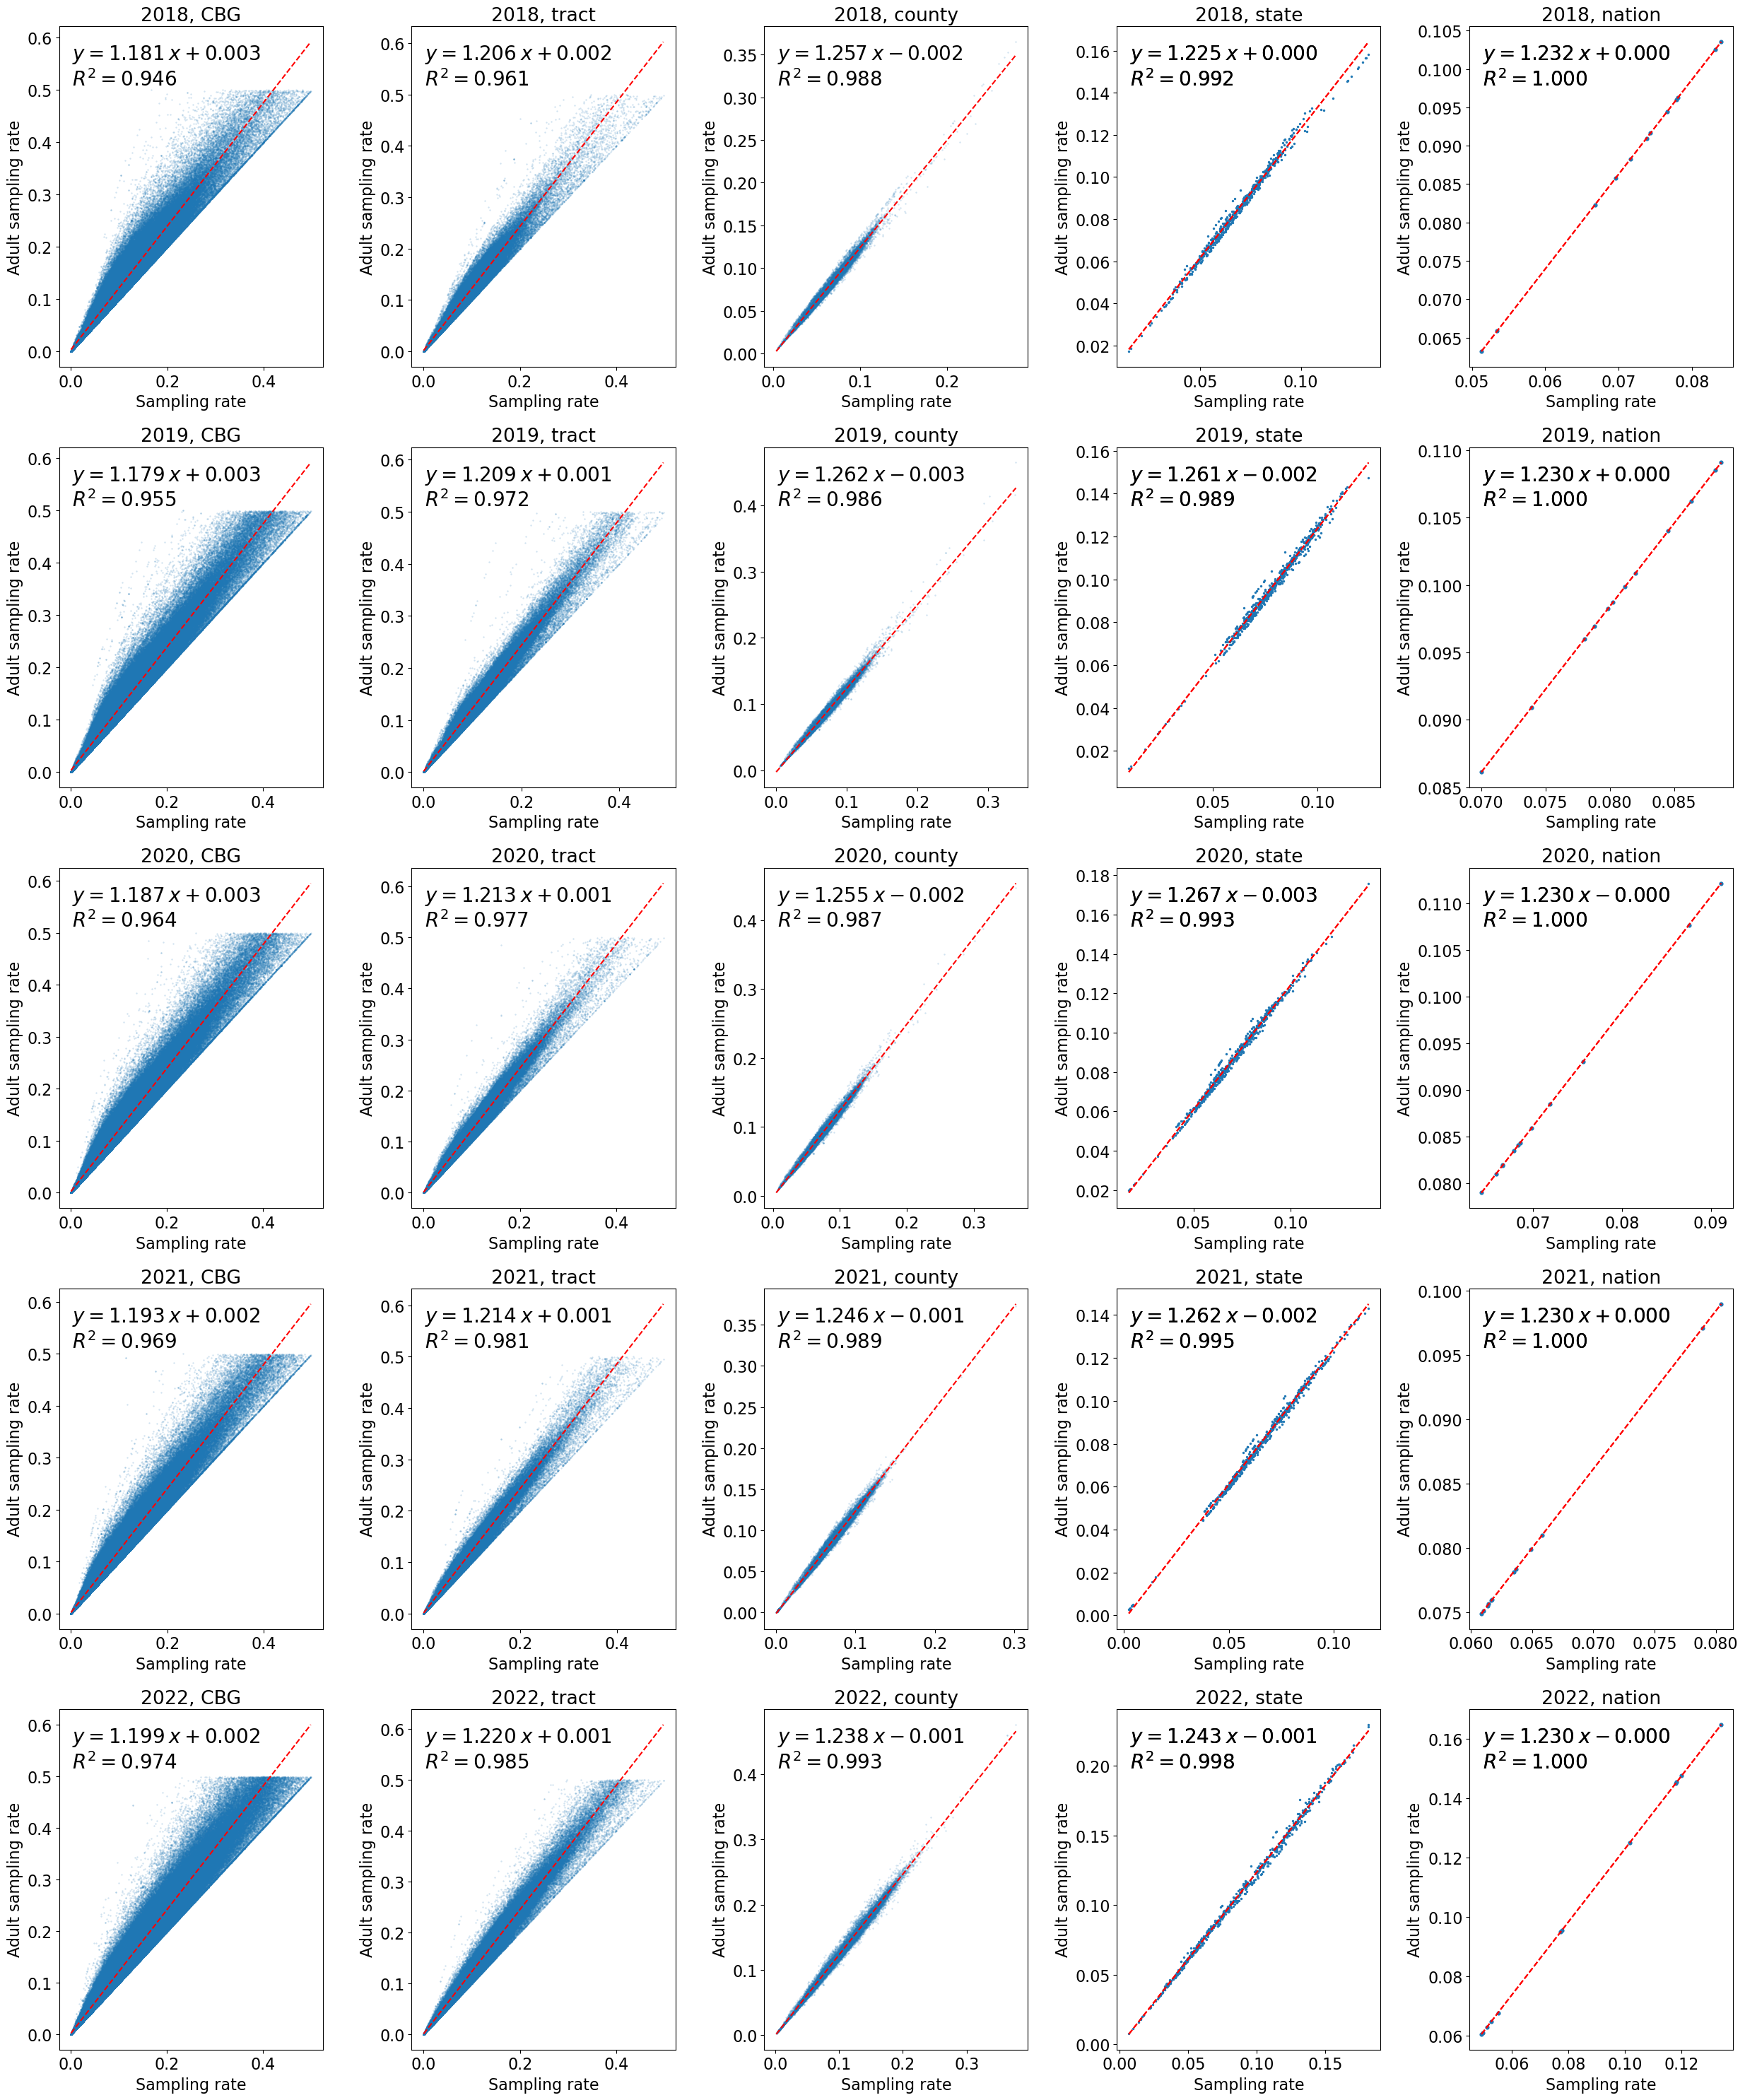

In [266]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import r2_score

def draw_r2_squared(ax2, x_true, y_observed):
    x_true = np.array(x_true).reshape((-1, 1))
    y_observed = np.array(y_observed).reshape((-1, 1))
    reg = LR().fit(x_true, y_observed)
    z = np.polyfit(x_true.ravel(), y_observed.ravel(), 1)
    p = np.poly1d(z)
    y_pred = p(x_true)
    R_squared = r2_score(y_observed, y_pred)
    # print()
    print("R squared:", R_squared)
    print("reg.coef_:", reg.coef_)
    text = f"$y={z[0]:0.3f}\:x{z[1]:+0.3f}$\n$R^2 = {R_squared:0.3f}$"
    # ax2.scatter(x=x_true, y=y_observed, s=2)
    # ax2.scatter(x=x_true, y=y_observed, alpha=0.3, s=2, linewidth=0, )
    ax2.text(0.05, 0.95, text, 
               transform=ax2.transAxes,
               fontsize=20,
               verticalalignment='top')
    
    # draw trend line
    line_ends = [min(x_true), max(x_true)]
    end_preds = p(line_ends)
    ax2.plot(line_ends, end_preds, 'r--')

levels = ['CBG', 'tract', 'county', 'state', 'nation']

fig, axes = plt.subplots(nrows=len(years), ncols=len(levels), figsize=(25, 30))

for row, year in enumerate(years[:]):   

    csv_name = os.path.join(save_dir, fr'adult_sampling_rates_{year}_monthly.csv')
    adult_sampling_rate_df = pd.read_csv(csv_name, dtype={'fips':str})
    filtered_df = adult_sampling_rate_df.query("sampling_rate < 0.5 and adult_sampling_rate < 0.5")
    
    for col, level in enumerate(levels):
        df = filtered_df.query(f"fips_level == '{level}' ")
    # for level, df in adult_sampling_rate_df.groupby("fips_level"):
        print(year, csv_name, level, len(df))
            
        ax = axes[row, col]
    
        alpha = 0.2
        size = 3
    
        if level == 'state':
            alpha = 1
            size = 6
            draw_r2_squared(ax2=ax, x_true=df['sampling_rate'], y_observed=df['adult_sampling_rate'])
    
        if level == 'nation':
            alpha = 1
            size = 20
            draw_r2_squared(ax2=ax, x_true=df['sampling_rate'], y_observed=df['adult_sampling_rate'])
             
        scatter2 = ax.scatter(x=df['sampling_rate'], y=df['adult_sampling_rate'], alpha=alpha, s=size, linewidth=0, )
    
        draw_r2_squared(ax2=ax, x_true=df['sampling_rate'], y_observed=df['adult_sampling_rate'])
        
        # ax2.scatter(x=x_true, y=y_observed, alpha=0.3, s=2, linewidth=0, )
        ax.set_title(f"{year}, {level}")
        ax.set_ylabel("Adult sampling rate")
        ax.set_xlabel("Sampling rate")
 

        # ax.set_aspect('equal')
    
        new_name = os.path.join(save_dir, fr'adult_sampling_rates_{year}_monthly.png')

        print()

plt.tight_layout()

plt.savefig(new_name)

### compute the county level adult_samping_rate

In [30]:
# # compute the county level adult_samping_rate

tract_df['aggre_column_value'] = tract_df['fips'].str[:5]
county_df = tract_df.groupby(['start_date', 'end_date', 'aggre_column_value'], as_index=False)[['CBG_count', 'device_count', 'population', '>14_popu_count']].sum()
county_df['fips_level'] = 'tract'
county_df['fips'] = county_df['aggre_column_value'].str[:11]
county_df['<15'] = county_df['population']  - county_df['>14_popu_count'] 
county_df['sampling_rate'] = county_df['device_count']  / county_df['population'] 
county_df['adult_sampling_rate'] = county_df['device_count'] / county_df['>14_popu_count'] 
county_df

,start_date,end_date,aggre_column_value,CBG_count,device_count,population,>14_popu_count,fips_level,fips,<15,sampling_rate,adult_sampling_rate
0,201801,201801,01001,32,3072,55200,47633.0,tract,01001,7567.0,0.055652,0.064493
1,201801,201801,01003,93,15613,208107,184891.0,tract,01003,23216.0,0.075024,0.084444
2,201801,201801,01005,23,1130,25782,21690.0,tract,01005,4092.0,0.043829,0.052098
3,201801,201801,01007,15,1324,22527,19579.0,tract,01007,2948.0,0.058774,0.067623
4,201801,201801,01009,35,4013,57645,48732.0,tract,01009,8913.0,0.069616,0.082348
...,...,...,...,...,...,...,...,...,...,...,...,...
38635,201812,201812,72145,37,1709,53371,45979.0,tract,72145,7392.0,0.032021,0.037169
38636,201812,201812,72147,6,168,8771,7512.0,tract,72147,1259.0,0.019154,0.022364
38637,201812,201812,72149,17,501,22993,19589.0,tract,72149,3404.0,0.021789,0.025576
38638,201812,201812,72151,23,714,34149,29301.0,tract,72151,4848.0,0.020908,0.024368


In [31]:
county_df['population'].sum() / 12


326212176.75

R squared: 0.988143348052001
reg.coef_: [[1.19375123]]


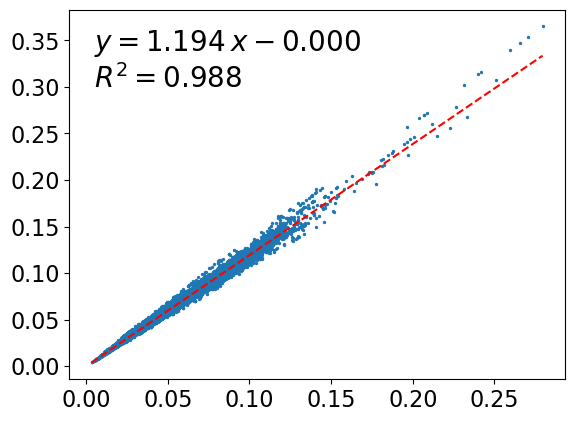

In [32]:
import matplotlib.pylab as plt
import numpy as np

fig, ax = plt.subplots()

df = county_df.query("sampling_rate < 0.5 and adult_sampling_rate < 0.5")

draw_r2_squared(ax2=ax, x_true=df['sampling_rate'], y_observed=df['adult_sampling_rate'])

### compute the  state level adult_samping_rate

In [37]:
county_df['aggre_column_value'] = county_df['fips'].str[:2]
state_df = county_df.groupby(['start_date', 'end_date', 'aggre_column_value'], as_index=False)[['CBG_count', 'device_count', 'population', '>14_popu_count']].sum()
state_df['fips_level'] = 'tract'
state_df['fips'] = state_df['aggre_column_value'].str[:2]
state_df['<15'] = state_df['population']  - state_df['>14_popu_count'] 
state_df['sampling_rate'] = state_df['device_count']  / state_df['population'] 
state_df['adult_sampling_rate'] = state_df['device_count'] / state_df['>14_popu_count'] 
state_df

,start_date,end_date,aggre_column_value,CBG_count,device_count,population,>14_popu_count,fips_level,fips,<15,sampling_rate,adult_sampling_rate
0,201801,201801,01,3431,310896,4864680,4150769.0,tract,01,713911.0,0.063909,0.074901
1,201801,201801,02,530,27830,737593,621132.0,tract,02,116461.0,0.037731,0.044805
2,201801,201801,04,4164,325001,6946566,5998503.0,tract,04,948063.0,0.046786,0.054180
3,201801,201801,05,2145,172183,2990671,2532903.0,tract,05,457768.0,0.057573,0.067979
4,201801,201801,06,23139,1877815,39142223,33643383.0,tract,06,5498840.0,0.047974,0.055815
...,...,...,...,...,...,...,...,...,...,...,...,...
619,201812,201812,53,4763,477539,7294336,6214271.0,tract,53,1080065.0,0.065467,0.076846
620,201812,201812,54,1592,121676,1829054,1550354.0,tract,54,278700.0,0.066524,0.078483
621,201812,201812,55,4471,415874,5777289,4850130.0,tract,55,927159.0,0.071984,0.085745
622,201812,201812,56,409,35750,581836,488424.0,tract,56,93412.0,0.061443,0.073195


R squared: 0.9958596118319368
reg.coef_: [[1.16415162]]


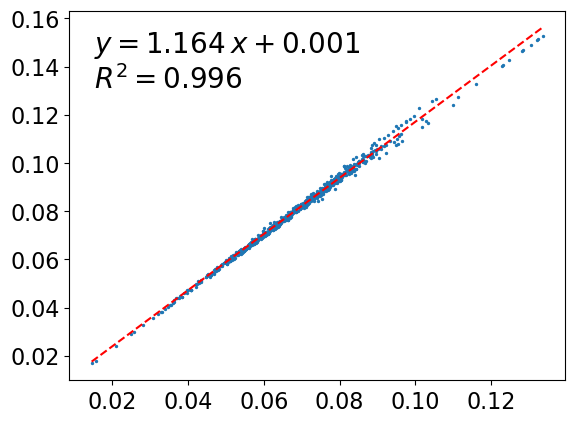

In [38]:
import matplotlib.pylab as plt
import numpy as np

fig, ax = plt.subplots()

df = state_df.query("sampling_rate < 0.5 and adult_sampling_rate < 0.5")

draw_r2_squared(ax2=ax, x_true=df['sampling_rate'], y_observed=df['adult_sampling_rate'])

### compute the nation level adult sampling rate

In [41]:
state_df['aggre_column_value'] = '0'
nation_df = state_df.groupby(['start_date', 'end_date', 'aggre_column_value'], as_index=False)[['CBG_count', 'device_count', 'population', '>14_popu_count']].sum()
nation_df['fips_level'] = 'tract'
nation_df['fips'] = nation_df['aggre_column_value'].str[:2]
nation_df['<15'] = nation_df['population']  - nation_df['>14_popu_count'] 
nation_df['sampling_rate'] = nation_df['device_count']  / nation_df['population'] 
nation_df['adult_sampling_rate'] = nation_df['device_count'] / nation_df['>14_popu_count'] 
nation_df

,start_date,end_date,aggre_column_value,CBG_count,device_count,population,>14_popu_count,fips_level,fips,<15,sampling_rate,adult_sampling_rate
0,201801,201801,0,219172,17431311,326202604,278819997.0,tract,0,47382607.0,0.053437,0.062518
1,201802,201802,0,219158,16734995,326188353,278806372.0,tract,0,47381981.0,0.051305,0.060024
2,201803,201803,0,219185,22716922,326210675,278826897.0,tract,0,47383778.0,0.069639,0.081473
3,201804,201804,0,219188,24260474,326212429,278828964.0,tract,0,47383465.0,0.074370,0.087008
4,201805,201805,0,219192,27405599,326216883,278832991.0,tract,0,47383892.0,0.084010,0.098287
5,201806,201806,0,219194,27143080,326221734,278838012.0,tract,0,47383722.0,0.083204,0.097344
6,201807,201807,0,219190,25417597,326215378,278831412.0,tract,0,47383966.0,0.077917,0.091158
7,201808,201808,0,219188,24082128,326211997,278828151.0,tract,0,47383846.0,0.073824,0.086369
8,201809,201809,0,219193,21791247,326217631,278833790.0,tract,0,47383841.0,0.066800,0.078151
9,201810,201810,0,219186,23374507,326213484,278829649.0,tract,0,47383835.0,0.071654,0.083831


R squared: 0.9999999998803729
reg.coef_: [[1.16992297]]


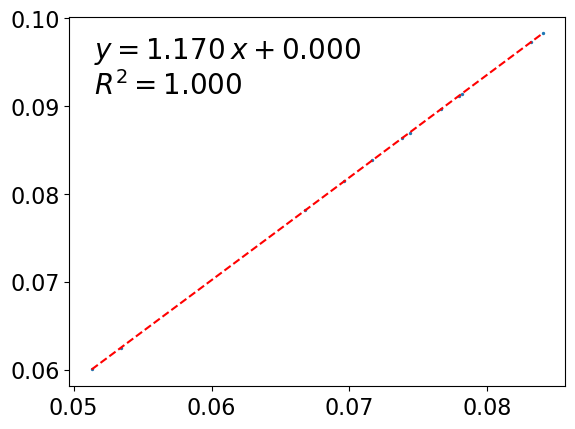

In [42]:
import matplotlib.pylab as plt
import numpy as np

fig, ax = plt.subplots()

df = nation_df.query("sampling_rate < 0.5 and adult_sampling_rate < 0.5")

draw_r2_squared(ax2=ax, x_true=df['sampling_rate'], y_observed=df['adult_sampling_rate'])

In [43]:
df

,start_date,end_date,aggre_column_value,CBG_count,device_count,population,>14_popu_count,fips_level,fips,<15,sampling_rate,adult_sampling_rate
0,201801,201801,0,219172,17431311,326202604,278819997.0,tract,0,47382607.0,0.053437,0.062518
1,201802,201802,0,219158,16734995,326188353,278806372.0,tract,0,47381981.0,0.051305,0.060024
2,201803,201803,0,219185,22716922,326210675,278826897.0,tract,0,47383778.0,0.069639,0.081473
3,201804,201804,0,219188,24260474,326212429,278828964.0,tract,0,47383465.0,0.074370,0.087008
4,201805,201805,0,219192,27405599,326216883,278832991.0,tract,0,47383892.0,0.084010,0.098287
5,201806,201806,0,219194,27143080,326221734,278838012.0,tract,0,47383722.0,0.083204,0.097344
6,201807,201807,0,219190,25417597,326215378,278831412.0,tract,0,47383966.0,0.077917,0.091158
7,201808,201808,0,219188,24082128,326211997,278828151.0,tract,0,47383846.0,0.073824,0.086369
8,201809,201809,0,219193,21791247,326217631,278833790.0,tract,0,47383841.0,0.066800,0.078151
9,201810,201810,0,219186,23374507,326213484,278829649.0,tract,0,47383835.0,0.071654,0.083831


In [ ]:
columns + ['totalpopulation']

,Female,Male,<15,15–17,18–24,25–34,35–44,45–54,55–64,>65,White,Black,Hispanic,Asian,NoSchool,HighSchool,NoCollege,Bachelor,Graduate,<20K,20K–30K,30K–50K,50K–100K,>100K,totalpopulation
0,0.598630,0.401370,0.100000,0.058904,0.142466,0.094521,0.119178,0.172603,0.131507,0.180822,0.839726,0.082192,0.009589,0.000000,0.145205,0.256164,0.401370,0.056164,0.068493,0.409524,0.053968,0.177778,0.187302,0.171429,730
1,0.513856,0.486144,0.217736,0.018211,0.100554,0.100554,0.100554,0.100554,0.100554,0.104513,0.848773,0.072842,0.015044,0.001584,0.047506,0.218527,0.266033,0.100554,0.082344,0.131980,0.058376,0.048223,0.439086,0.322335,1263
2,0.529341,0.470659,0.213174,0.093413,0.043114,0.094611,0.152096,0.091018,0.108982,0.196407,0.330539,0.152096,0.035928,0.000000,0.081437,0.370060,0.451497,0.055090,0.007186,0.471698,0.066038,0.166667,0.229560,0.066038,835
3,0.408363,0.591637,0.128114,0.016904,0.089858,0.112989,0.112989,0.112989,0.112989,0.106762,0.429715,0.112989,0.000000,0.000000,0.112989,0.299822,0.412811,0.112989,0.044484,0.167568,0.008108,0.283784,0.335135,0.205405,1124
4,0.487022,0.512978,0.111391,0.028839,0.045782,0.045782,0.045782,0.045782,0.045782,0.106705,0.672675,0.045782,0.083994,0.011536,0.045782,0.265321,0.311103,0.045782,0.052632,0.153996,0.058480,0.146199,0.320663,0.211501,2774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220328,0.456399,0.543601,0.278596,0.013590,0.089468,0.050963,0.118913,0.079275,0.135900,0.185730,0.814270,0.000000,1.000000,0.000000,0.143828,0.172140,0.315968,0.095130,0.019253,0.679325,0.080169,0.240506,0.000000,0.000000,883
220329,0.599683,0.400317,0.138724,0.014269,0.050337,0.050337,0.050337,0.050337,0.050337,0.107412,0.771304,0.035275,1.000000,0.000000,0.050337,0.267539,0.317876,0.050337,0.043995,0.432432,0.213514,0.222973,0.087838,0.025676,2523
220330,0.518668,0.481332,0.252270,0.076690,0.128153,0.053481,0.090817,0.128153,0.089808,0.017154,0.542886,0.128153,0.964682,0.000000,0.000000,0.030272,0.030272,0.128153,0.046418,0.253906,0.164062,0.152344,0.359375,0.070312,991
220331,0.495878,0.504122,0.077362,0.015219,0.051997,0.080533,0.080533,0.080533,0.080533,0.166772,0.707673,0.014585,1.000000,0.000000,0.080533,0.305644,0.386176,0.080533,0.022828,0.528571,0.014286,0.076786,0.066071,0.000000,1577


In [50]:
df
# monthly_sampling_rate_df

level_fips_len_dict = {'nation': 0, 'CBG':12, "tract":11, 'county':5}

for level, fips_len in level_fips_len_dict.items():
    print(level, fips_len)
    
    if fips_len == 0:
        level_df = social_variable_df[columns + ['totalpopulation']].sum()
        level_df['level'] = level

level_df

nation 0
CBG 12
tract 11
county 5


Female               111588.354611
Male                 107629.999496
<15                   33721.435540
15–17                  7711.951902
18–24                 14282.014240
25–34                 18788.953100
35–44                 18486.490449
45–54                 19454.713508
55–64                 20366.678896
>65                   31489.201852
White                159943.638416
Black                 10615.964791
Hispanic              37704.896576
Asian                  5594.947456
NoSchool              13578.919747
HighSchool            42784.598398
NoCollege             56363.518145
Bachelor              17194.586373
Graduate              15487.422447
<20K                  34634.454537
20K–30K               20460.346404
30K–50K               37693.707312
50K–100K              61834.520560
>100K                 56461.429929
totalpopulation   327939105.000000
level                       nation
dtype: object

In [54]:
merged_df['>14'] = merged_df['population'] * (1 - merged_df['<15'])
merged_df['adult_sampling_rate'] = merged_df['device_count'] / merged_df['>14_popu_count']
new_name = os.path.join(save_dir, fr'adult_sampling_rates_{year}_monthly.csv')
merged_df.to_csv(new_name, index=False)
merged_df

,start_date,end_date,CBG_count,fips,device_count,population,year,aggre_column_value,sampling_rate,fips_len,fips_level,totalpopulation,<15,>14_popu_count,adult_sampling_rate,>14
0,202201,202201,1,010010201001,277,730,2022,10010201001,0.379452,12,CBG,730,0.100000,657.000000,0.421613,657.000000
1,202202,202202,1,010010201001,384,730,2022,10010201001,0.526027,12,CBG,730,0.100000,657.000000,0.584475,657.000000
2,202203,202203,1,010010201001,921,730,2022,10010201001,1.261644,12,CBG,730,0.100000,657.000000,1.401826,657.000000
3,202204,202204,1,010010201001,495,730,2022,10010201001,0.678082,12,CBG,730,0.100000,657.000000,0.753425,657.000000
4,202205,202205,1,010010201001,642,730,2022,10010201001,0.879452,12,CBG,730,0.100000,657.000000,0.977169,657.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2640099,202208,202208,1,721270037002,2,607,2022,721270037002,0.003295,12,CBG,607,0.135091,525.000000,0.003810,525.000000
2640100,202209,202209,1,721270037002,1,607,2022,721270037002,0.001647,12,CBG,607,0.135091,525.000000,0.001905,525.000000
2640101,202210,202210,1,721270037002,2,607,2022,721270037002,0.003295,12,CBG,607,0.135091,525.000000,0.003810,525.000000
2640102,202211,202211,1,721270037002,1,607,2022,721270037002,0.001647,12,CBG,607,0.135091,525.000000,0.001905,525.000000


In [93]:
merged_df.sample(10)

,start_date,end_date,CBG_count,fips,device_count,population,year,aggre_column,sampling_rate,fips_len,fips_level,totalpopulation,<15,>14,adult_sampling_rate
722461,201906,201906,1,170310802011,140,1306,2019,170310802011,0.107198,12,cbg,1306,0.017611,1283.0,0.109119
936403,201906,201906,1,201690004004,41,547,2019,201690004004,0.074954,12,cbg,547,0.054845,517.0,0.079304
59271,201901,201901,1,040131036153,153,2021,2019,40131036153,0.075705,12,cbg,2021,0.188521,1640.0,0.093293
1836731,201901,201901,1,390490094203,71,1042,2019,390490094203,0.068138,12,cbg,1042,0.264875,766.0,0.092689
2166823,201903,201903,1,470930063011,131,1802,2019,470930063011,0.072697,12,cbg,1802,0.159822,1514.0,0.086526
171237,201904,201904,1,060371236022,41,813,2019,60371236022,0.050431,12,cbg,813,0.129151,708.0,0.057910
2116365,201907,201907,1,450450038013,132,1610,2019,450450038013,0.081988,12,cbg,1610,0.091925,1462.0,0.090287
1467158,201909,201909,1,340155008001,110,907,2019,340155008001,0.121279,12,cbg,907,0.187431,737.0,0.149254
1636488,201902,201902,1,360630234012,67,1503,2019,360630234012,0.044578,12,cbg,1503,0.177645,1236.0,0.054207
1653702,201912,201912,1,360810117001,33,842,2019,360810117001,0.039192,12,cbg,842,0.077197,777.0,0.042471


In [101]:
merged_df['<15'].describe()
merged_df[['<15', 'sampling_rate', 'adult_sampling_rate']].describe()

,<15,sampling_rate,adult_sampling_rate
count,2.630314e+06,2.630314e+06,2.630314e+06
mean,1.538395e-01,9.153578e-02,1.075424e-01
std,6.535025e-02,1.432938e+00,1.445355e+00
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.134812e-01,5.335366e-02,6.321839e-02
50%,1.524702e-01,6.893819e-02,8.193980e-02
75%,1.932555e-01,8.972125e-02,1.067503e-01
max,7.676768e-01,9.600000e+02,9.600000e+02


## compare adult sampling rate and populatino sampling rate

In [55]:
import os
import pandas as pd

In [56]:
data_dir = r'D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Safegraph_bias\20230916'
save_dir = r'D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Safegraph_bias\20230916'

In [11]:
years = [2018, 2019, 2020, 2021, 2022]

for year in years[:-1]:
    fname = os.path.join(data_dir, f"CBG_adult_sampling_rates_{year}_monthly.csv")
    df = pd.read_csv(fname, dtype={'fips':str})

df

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Research\\safegraph_bias\\CBG_adult_sampling_rates_2018_monthly.csv'

In [10]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)

df.describe()

C:\Users\USER\.conda\envs\geo\lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,totalpopulation,male,female,under5years,5to9years,10to14years,15to17years,18to24years,25to34years,35to44years,45to54years,55to64years,65to74years,75to84years,85yearsandover,whitealone,blackorafricanamericanalone,americanindianandalaskanativealone,asianalone,nativehawaiianandotherpacificislanderalone,someotherracealone,twoormoreraces,Hispanic_or_Latino,population25yearsandover,population25yearsandoverlessthanhighschool,population25yearsandoverhighschoolgraduateincludesequivalency,population25yearsandoversomecollege,population25yearsandoverbachelorsdegree,population25yearsandovermastersdegree,population25yearsandoverprofessionalschooldegree,population25yearsandoverdoctoratedegree,households,householdslessthan10000,households10000to14999,households15000to19999,households20000to24999,households25000to29999,households30000to34999,households35000to39999,households40000to44999,households45000to49999,households50000to59999,households60000to74999,households75000to99999,households100000to124999,households125000to149999,households150000to199999,households200000ormore,Female,Male,<15,15–17,18–24,25–34,35–44,45–54,55–64,>65,White,Black,Hispanic,Asian,NoSchool,HighSchool,NoCollege,Bachelor,Graduate,household_size,<20K,20K–30K,30K–50K,50K–100K,>100K
count,220333.000000,220333.000000,220333.000000,220333.000000,220333.000000,220333.000000,220333.000000,220333.000000,220333.000000,220333.000000,220333.000000,220333.000000,220333.000000,220333.000000,220333.000000,220333.000000,220333.000000,220333.000000,220333.000000,220333.000000,220333.000000,220333.000000,220333.000000,220333.000000,220333.000000,220333.000000,220333.000000,220333.000000,220333.000000,220333.000000,220333.000000,220304.000000,220304.000000,220304.000000,220304.000000,220304.000000,220304.000000,220304.000000,220304.000000,220304.000000,220304.000000,220304.000000,220304.000000,220304.000000,220304.000000,220304.000000,220304.000000,220304.000000,219214.000000,219214.000000,219214.000000,219214.000000,219214.000000,219214.000000,219214.000000,219214.000000,219214.000000,219214.000000,219214.000000,219214.000000,219214.000000,219214.000000,219214.000000,219214.000000,219214.000000,219214.000000,219214.000000,219185.000000,218733.000000,218733.000000,218733.000000,218733.000000,218733.000000
mean,1480.616744,728.883349,752.011346,70.179165,71.789228,73.088434,51.472535,86.743702,105.478698,105.445058,195.319208,110.604939,93.445916,58.433453,26.551987,1076.453073,58.116505,12.288568,36.883150,2.646090,74.147835,38.690296,276.251288,1002.139207,78.166180,271.974593,119.070280,96.505267,61.468940,20.729119,13.317374,548.890647,33.327211,25.037698,25.090843,25.748961,25.247994,25.185671,23.550671,23.843385,21.111205,40.141686,50.194431,60.274412,44.380034,29.926492,31.298242,30.184772,0.509088,0.490921,0.155477,0.035542,0.066107,0.085781,0.084626,0.132270,0.092818,0.141236,0.731987,0.048108,0.170019,0.025314,0.063008,0.195253,0.258260,0.077690,0.069310,inf,0.165997,0.098066,0.175985,0.282829,0.245177
std,976.995198,506.909640,506.867165,43.949800,43.696502,43.713548,40.070325,41.887435,34.466199,33.855121,152.631749,29.643637,38.382895,40.475832,30.525624,802.340452,55.211402,69.616772,48.665899,23.759151,181.012460,42.562875,497.372201,641.552256,45.743899,193.663756,22.390772,40.689081,46.832505,38.222080,23.617777,339.088932,34.770840,28.807306,27.563839,27.261502,26.628070,26.403198,25.224038,25.388180,23.497925,33.170392,36.747744,40.188019,37.677658,32.709939,36.192073,40.055069,0.064782,0.064784,0.065036,0.025249,0.038120,0.043606,0.038908,0.054504,0.046178,0.077891,0.265937,0.063035,0.240021,0.037353,0.046768,0.095697,0.119317,0.046093,0.064786,NaN,0.134238,0.074790,0.095871,0.112353,0.177911
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [ ]:
a

In [16]:
df['county_fips'] = df['fips'].str[:5]

In [ ]:
county_df = df.groupby(['county_fips', 'start_date'])[['']]

R squared: 0.9825619318457087
reg.coef_: [[1.1755769]]


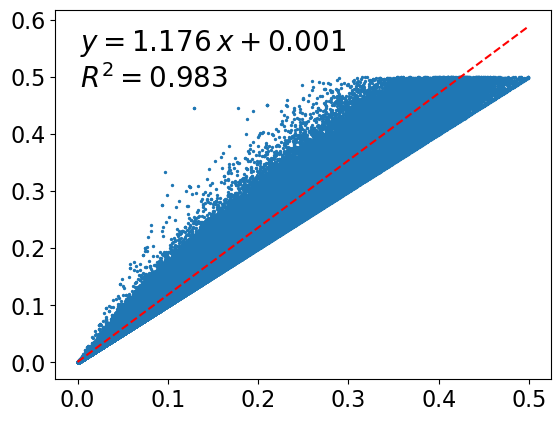

In [47]:
import matplotlib.pylab as plt
import numpy as np

fig, ax = plt.subplots()

df = df.query("sampling_rate < 0.5 and adult_sampling_rate < 0.5")

draw_r2_squared(ax2=ax, x_true=df['sampling_rate'], y_observed=df['adult_sampling_rate'])

# Check the Zhenlong data

In [259]:
year = 2019
new_2018_df_raw = pd.read_csv(fr'D:\Research\safegraph_bias\cbg_acs_{year}_county_tract_new20230929.csv')
new_2018_df_raw

C:\Users\USER\AppData\Local\Temp\ipykernel_15644\4232727937.py:2: DtypeWarning: Columns (0,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120) have mixed types. Specify dtype option on import or set low_memory=False.
  new_2018_df_raw = pd.read_csv(fr'D:\Research\safegraph_bias\cbg_acs_{year}_county_tract_new20230929.csv')


,FIPS,Geographic Identifier,Area Name,Qualifying Name,State Postal Abbreviation,Summary Level,Geographic Component,File identification,Logical Record Number,US,Census Region,Census Division,State (Census Code),State (FIPS Code),County of current residence,County Subdivision (FIPS),Place (FIPS Code),Place (State FIPS + Place FIPS),Census Tract,Block Group,Consolidated City,American Indian Area/Alaska Native Area/Hawaiian Home Land (Census),American Indian Area/Alaska Native Area/Hawaiian Home Land (FIPS),American Indian Trust Land/Hawaiian Home Land Indicator,American Indian Tribal Subdivision (Census),American Indian Tribal Subdivision (FIPS),Alaska Native Regional Corporation (FIPS),Metropolitan and Micropolitan Statistical Area,Combined Statistical Area,Metropolitan Division,Metropolitan Area Central City,Metropolitan/Micropolitan Indicator Flag,New England City and Town Area,New England City and Town Area.1,New England City and Town Area Division,Urban Area,Urban Area Central Place,Current Congressional District ***,State Legislative District Upper,State Legislative District Lower,Voting District,ZIP Code Tabulation Area (3-digit),5-digit ZIP Code Tabulation Area,Subminor Civil Division (FIPS),State-School District (Elementary),State-School District (Secondary),State-School District (Unified),Urban/Rural,Principal City Indicator,Traffic Analysis Zone,Urban Growth Area,Tribal Tract,Tribal Block Group,Public Use Microdata Area - 5% File,Public Use Microdata Area - 1% File,Total Population:,Total Population: Male,Total Population: Female,Total Population:.1,Total Population: Under 5 Years,Total Population: 5 to 9 Years,Total Population: 10 to 14 Years,Total Population: 15 to 17 Years,Total Population: 18 to 24 Years,Total Population: 25 to 34 Years,Total Population: 35 to 44 Years,Total Population: 45 to 54 Years,Total Population: 55 to 64 Years,Total Population: 65 to 74 Years,Total Population: 75 to 84 Years,Total Population: 85 Years and Over,Total Population:.2,Total Population: White Alone,Total Population: Black or African American Alone,Total Population: American Indian and Alaska Native Alone,Total Population: Asian Alone,Total Population: Native Hawaiian and Other Pacific Islander Alone,Total Population: Some Other Race Alone,Total Population: Two or More Races,Total Population,Total Population: Not Hispanic or Latino,Total Population: Not Hispanic or Latino: White Alone,Total Population: Not Hispanic or Latino: Black or African American Alone,Total Population: Not Hispanic or Latino: American Indian and Alaska Native Alone,Total Population: Not Hispanic or Latino: Asian Alone,Total Population: Not Hispanic or Latino: Native Hawaiian and Other Pacific Islander Alone,Total Population: Not Hispanic or Latino: Some Other Race Alone,Total Population: Not Hispanic or Latino: Two or More Races,Total Population: Hispanic or Latino,Total Population: Hispanic or Latino: White Alone,Total Population: Hispanic or Latino: Black or African American Alone,Total Population: Hispanic or Latino: American Indian and Alaska Native Alone,Total Population: Hispanic or Latino: Asian Alone,Total Population: Hispanic or Latino: Native Hawaiian and Other Pacific Islander Alone,Total Population: Hispanic or Latino: Some Other Race Alone,Total Population: Hispanic or Latino: Two or More Races,Population 25 Years and Over:,Population 25 Years and Over: Less than High School,Population 25 Years and Over: High School Graduate (Includes Equivalency),Population 25 Years and Over: Some College,Population 25 Years and Over: Bachelor's Degree,Population 25 Years and Over: Master's Degree,Population 25 Years and Over: Professional School Degree,Population 25 Years and Over: Doctorate Degree,Households:,"Households: Less than $10,000","Households: $10,000 to $14,999","Households: $15,000 to $19,999","Households: $20,000 to $24,999","Households: $25,000 to $29,999","Households: $30,000 to $34,999","Households: $35,000 to $39,999","Households: $40,000 to $

In [262]:
year = 2018

new_2018_df_raw = pd.read_csv(fr'D:\Research\safegraph_bias\cbg_acs_{year}_county_tract_new20230929.csv')
new_2018_df = new_2018_df_raw.fillna(0).iloc[1:, [0] + list(range(55, 121, 1))]
new_2018_df.rename(columns={ 'FIPS': 'fips'}, inplace=True)

for col in new_2018_df.columns[1:]:
    # print(col)
    new_2018_df[col] = new_2018_df[col].astype(int)

new_columns = [col.replace('Total Population: ', '').replace(" ", '').replace(r"'sDegree", r"sDegree") for col in new_2018_df.columns]
new_2018_df.columns = new_columns

kept_columns = ['fips', 'TotalPopulation:', 'Male', 'Female', 
       'Under5Years', '5to9Years', '10to14Years', '15to17Years', '18to24Years',
       '25to34Years', '35to44Years', '45to54Years', '55to64Years',
       '65to74Years', '75to84Years', '85YearsandOver', 
       'WhiteAlone', 'BlackorAfricanAmericanAlone',
       'AmericanIndianandAlaskaNativeAlone', 'AsianAlone',
       'NativeHawaiianandOtherPacificIslanderAlone', 'SomeOtherRaceAlone',
       'TwoorMoreRaces',  'HispanicorLatino',
       'Population25YearsandOver:',
       'Population25YearsandOver:LessthanHighSchool',
       'Population25YearsandOver:HighSchoolGraduate(IncludesEquivalency)',
       'Population25YearsandOver:SomeCollege',
       'Population25YearsandOver:BachelorsDegree',
       'Population25YearsandOver:MastersDegree',
       'Population25YearsandOver:ProfessionalSchoolDegree',
       'Population25YearsandOver:DoctorateDegree', 'Households:',
       'Households:Lessthan$10,000', 'Households:$10,000to$14,999',
       'Households:$15,000to$19,999', 'Households:$20,000to$24,999',
       'Households:$25,000to$29,999', 'Households:$30,000to$34,999',
       'Households:$35,000to$39,999', 'Households:$40,000to$44,999',
       'Households:$45,000to$49,999', 'Households:$50,000to$59,999',
       'Households:$60,000to$74,999', 'Households:$75,000to$99,999',
       'Households:$100,000to$124,999', 'Households:$125,000to$149,999',
       'Households:$150,000to$199,999', 'Households:$200,000orMore']

print("kept column count", len(kept_columns))

new_2018_df = new_2018_df[kept_columns]

new_columns = ['fips'] + list(old_2018_df.columns[-48:])

new_2018_df.columns = new_columns

if year == 2018:
    new_2018_df['state'] = new_2018_df_raw['State/U.S.-Abbreviation (USPS)']
    
if year == 2019:
    new_2018_df['state'] = new_2018_df_raw['State Postal Abbreviation']
    
new_2018_df['fips'] = new_2018_df['fips'].astype(str).str.zfill(12)
new_2018_df['state_fips'] = new_2018_df['fips'].str[:2]
new_2018_df['county_fips'] = new_2018_df['fips'].str[:5]
new_2018_df['tract_fips'] = new_2018_df['fips'].str[:11]

new_2018_df.to_csv(fr'D:\Research\safegraph_bias\cbg_acs_{year}_county_tract_new20230929_cleaned.csv', index=False)
new_2018_df

C:\Users\USER\AppData\Local\Temp\ipykernel_15644\3831752128.py:3: DtypeWarning: Columns (0,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120) have mixed types. Specify dtype option on import or set low_memory=False.
  new_2018_df_raw = pd.read_csv(fr'D:\Research\safegraph_bias\cbg_acs_{year}_county_tract_new20230929.csv')


kept column count 49


,fips,totalpopulation,male,female,under5years,5to9years,10to14years,15to17years,18to24years,25to34years,35to44years,45to54years,55to64years,65to74years,75to84years,85yearsandover,whitealone,blackorafricanamericanalone,americanindianandalaskanativealone,asianalone,nativehawaiianandotherpacificislanderalone,someotherracealone,twoormoreraces,Hispanic_or_Latino,population25yearsandover,population25yearsandoverlessthanhighschool,population25yearsandoverhighschoolgraduateincludesequivalency,population25yearsandoversomecollege,population25yearsandoverbachelorsdegree,population25yearsandovermastersdegree,population25yearsandoverprofessionalschooldegree,population25yearsandoverdoctoratedegree,households,householdslessthan10000,households10000to14999,households15000to19999,households20000to24999,households25000to29999,households30000to34999,households35000to39999,households40000to44999,households45000to49999,households50000to59999,households60000to74999,households75000to99999,households100000to124999,households125000to149999,households150000to199999,households200000ormore,state,state_fips,county_fips,tract_fips
1,010010201001,636,262,374,20,39,24,40,95,40,89,62,131,76,6,14,546,44,0,0,0,0,46,14,418,87,141,108,39,22,21,0,294,21,77,22,15,23,9,28,9,9,4,17,33,0,6,21,0,al,01,01001,01001020100
2,010010201002,1287,667,620,54,42,112,76,118,153,148,257,178,96,35,18,1063,117,0,17,0,0,90,54,885,36,302,219,197,116,0,15,471,10,15,34,6,4,24,4,13,10,51,45,109,42,25,55,24,al,01,01001,01001020100
3,010010202001,810,398,412,34,68,33,54,53,79,110,98,99,110,43,29,262,521,0,0,27,0,0,27,568,77,298,132,56,5,0,0,322,5,101,35,10,15,18,13,28,10,12,20,33,17,5,0,0,al,01,01001,01001020200
4,010010202002,1218,693,525,50,74,77,27,115,211,187,253,122,56,33,13,557,608,0,19,0,9,25,9,875,168,288,238,126,43,5,7,397,38,24,13,9,14,26,6,38,36,50,14,60,42,14,13,0,al,01,01001,01001020200
5,010010203001,2641,1266,1375,55,335,203,68,131,584,302,306,280,198,109,70,1742,475,0,30,5,299,90,299,1849,232,645,620,180,153,0,19,948,64,43,69,21,29,23,76,13,30,166,154,85,99,47,22,7,al,01,01001,01001020300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220329,721537506011,699,413,286,39,76,0,0,73,61,73,42,184,138,0,13,499,0,0,0,0,200,0,699,511,200,99,144,41,27,0,0,250,107,35,50,0,0,0,29,0,21,8,0,0,0,0,0,0,pr,72,72153,72153750601
220330,721537506012,2432,990,1442,257,173,98,35,314,199,216,443,236,287,133,41,1991,101,46,0,0,268,26,2432,1555,289,504,342,329,74,17,0,670,85,160,47,72,59,36,34,24,58,77,8,10,0,0,0,0,pr,72,72153,72153750601
220331,721537506013,976,366,610,88,38,146,58,94,138,92,156,103,53,0,10,633,224,0,0,0,119,0,960,552,10,67,129,291,10,45,0,231,56,26,25,25,14,0,0,16,0,21,29,0,19,0,0,0,pr,72,72153,72153750601
220332,721537506021,1707,771,936,55,35,34,26,76,253,215,335,266,238,165,9,1231,36,0,0,0,431,9,1707,1481,556,594,81,217,33,0,0,573,286,107,63,28,0,12,43,0,0,9,25,0,0,0,0,0,pr,72,72153,72153750602


In [248]:

# new_2018_df.columns

In [228]:
new_columns
old_2018_df.columns[:]

Index(['state_fips', 'county_fips', 'tract_fips', 'fips', 'state',
       'totalpopulation', 'male', 'female', 'under5years', '5to9years',
       '10to14years', '15to17years', '18to24years', '25to34years',
       '35to44years', '45to54years', '55to64years', '65to74years',
       '75to84years', '85yearsandover', 'whitealone',
       'blackorafricanamericanalone', 'americanindianandalaskanativealone',
       'asianalone', 'nativehawaiianandotherpacificislanderalone',
       'someotherracealone', 'twoormoreraces', 'Hispanic_or_Latino',
       'population25yearsandover',
       'population25yearsandoverlessthanhighschool',
       'population25yearsandoverhighschoolgraduateincludesequivalency',
       'population25yearsandoversomecollege',
       'population25yearsandoverbachelorsdegree',
       'population25yearsandovermastersdegree',
       'population25yearsandoverprofessionalschooldegree',
       'population25yearsandoverdoctoratedegree', 'households',
       'householdslessthan10000', 

In [219]:
old_2018_df.iloc[:, -48:]

,totalpopulation,male,female,under5years,5to9years,10to14years,15to17years,18to24years,25to34years,35to44years,45to54years,55to64years,65to74years,75to84years,85yearsandover,whitealone,blackorafricanamericanalone,americanindianandalaskanativealone,asianalone,nativehawaiianandotherpacificislanderalone,someotherracealone,twoormoreraces,Hispanic_or_Latino,population25yearsandover,population25yearsandoverlessthanhighschool,population25yearsandoverhighschoolgraduateincludesequivalency,population25yearsandoversomecollege,population25yearsandoverbachelorsdegree,population25yearsandovermastersdegree,population25yearsandoverprofessionalschooldegree,population25yearsandoverdoctoratedegree,households,householdslessthan10000,households10000to14999,households15000to19999,households20000to24999,households25000to29999,households30000to34999,households35000to39999,households40000to44999,households45000to49999,households50000to59999,households60000to74999,households75000to99999,households100000to124999,households125000to149999,households150000to199999,households200000ormore
0,636,262,374,20,39,24,40,95,40,89,62,127,76,6,14,546,44,0,0,0,0,46,14,418,87,141,108,39,22,21,0,294.0,21.0,77.0,22.0,15.0,23.0,9.0,28.0,9.0,9.0,4.0,17.0,33.0,0.0,6.0,21.0,0.0
1,1287,667,620,54,42,112,76,118,127,127,257,127,96,35,18,1063,117,0,17,0,0,90,54,885,36,302,127,127,116,0,15,471.0,10.0,15.0,34.0,6.0,4.0,24.0,4.0,13.0,10.0,51.0,45.0,109.0,42.0,25.0,55.0,24.0
2,810,398,412,34,68,33,54,53,79,110,98,99,110,43,29,262,127,0,0,27,0,0,27,568,77,298,127,56,5,0,0,322.0,5.0,101.0,35.0,10.0,15.0,18.0,13.0,28.0,10.0,12.0,20.0,33.0,17.0,5.0,0.0,0.0
3,1218,693,525,50,74,77,27,115,127,127,253,122,56,33,13,557,127,0,19,0,9,25,9,875,127,288,127,126,43,5,7,397.0,38.0,24.0,13.0,9.0,14.0,26.0,6.0,38.0,36.0,50.0,14.0,60.0,42.0,14.0,13.0,0.0
4,2641,1266,1375,55,127,127,68,127,127,127,306,127,127,109,70,1742,127,0,30,5,299,90,299,1849,127,645,127,127,127,0,19,948.0,64.0,43.0,69.0,21.0,29.0,23.0,76.0,13.0,30.0,127.0,127.0,85.0,99.0,47.0,22.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220328,699,413,286,39,76,0,0,73,61,73,42,127,127,0,13,499,0,0,0,0,200,0,699,511,127,99,127,41,27,0,0,250.0,107.0,35.0,50.0,0.0,0.0,0.0,29.0,0.0,21.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
220329,2432,990,1442,127,127,98,35,127,127,127,443,127,127,127,41,1991,101,46,0,0,268,26,2432,1555,127,504,127,127,74,17,0,670.0,85.0,127.0,47.0,72.0,59.0,36.0,34.0,24.0,58.0,77.0,8.0,10.0,0.0,0.0,0.0,0.0
220330,976,366,610,88,38,127,58,94,127,92,156,103,53,0,10,633,127,0,0,0,119,0,960,552,10,67,127,127,10,45,0,231.0,56.0,26.0,25.0,25.0,14.0,0.0,0.0,16.0,0.0,21.0,29.0,0.0,19.0,0.0,0.0,0.0
220331,1707,771,936,55,35,34,26,76,127,127,335,127,127,127,9,1231,36,0,0,0,431,9,1707,1481,127,594,81,127,33,0,0,573.0,127.0,107.0,63.0,28.0,0.0,12.0,43.0,0.0,0.0,9.0,25.0,0.0,0.0,0.0,0.0,0.0


In [174]:
old_columns = ['state_fips', 'county_fips', 'tract_fips', 'fips', 'state',
       'totalpopulation', 'male', 'female', 'under5years', '5to9years',
       '10to14years', '15to17years', '18to24years', '25to34years',
       '35to44years', '45to54years', '55to64years', '65to74years',
       '75to84years', '85yearsandover', 'whitealone',
       'blackorafricanamericanalone', 'americanindianandalaskanativealone',
       'asianalone', 'nativehawaiianandotherpacificislanderalone',
       'someotherracealone', 'twoormoreraces', 'Hispanic_or_Latino',
       'population25yearsandover',
       'population25yearsandoverlessthanhighschool',
       'population25yearsandoverhighschoolgraduateincludesequivalency',
       'population25yearsandoversomecollege',
       'population25yearsandoverbachelorsdegree',
       'population25yearsandovermastersdegree',
       'population25yearsandoverprofessionalschooldegree',
       'population25yearsandoverdoctoratedegree', 'households',
       'householdslessthan10000', 'households10000to14999',
       'households15000to19999', 'households20000to24999',
       'households25000to29999', 'households30000to34999',
       'households35000to39999', 'households40000to44999',
       'households45000to49999', 'households50000to59999',
       'households60000to74999', 'households75000to99999',
       'households100000to124999', 'households125000to149999',
       'households150000to199999', 'households200000ormore']


In [254]:
old_2018_df = pd.read_csv(r'D:\Research\safegraph_bias\cbg_acs_2018_county_tract.csv')
len(old_2018_df.columns)

53

## generate simulated monthly panel summary

In [289]:
sampling_data_dir = r'D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Safegraph_bias\20230916'
save_dir = r'D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Safegraph_bias\20230916\simulated_monthly_home_panel_summary'

years = [2018, 2019, 2020, 2021, 2022]

for year in years:
    try:
        sampling_rate_df = pd.read_csv(os.path.join(sampling_data_dir, f'CBG_adult_sampling_rates_{year}_monthly.csv'), dtype={'fips':str}, encoding='utf16')
    except:
        sampling_rate_df = pd.read_csv(os.path.join(sampling_data_dir, f'CBG_adult_sampling_rates_{year}_monthly.csv'), dtype={'fips':str}, encoding='utf8')
    # sampling_rate_df = pd.read_csv(os.path.join(sampling_data_dir, f'CBG_adult_sampling_rates_{year}_monthly.csv'), dtype={'fips':str})
    print(year)

    panel_df = sampling_rate_df[['year', 'fips', 'start_date', 'device_count']]
    panel_df['month'] = panel_df['start_date'].astype(str).str[-2:]
    panel_df['census_block_group'] = panel_df['fips'].astype(str).str.zfill(12)
    panel_df['number_devices_residing'] = panel_df['device_count'] 

    panel_df[['year', 'month', 'census_block_group', 'number_devices_residing']].to_csv(os.path.join(save_dir, fr'US_monthly_home_panel_summary_{year}.csv'), index=False)

2018


C:\Users\USER\AppData\Local\Temp\ipykernel_15644\754546897.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_df['month'] = panel_df['start_date'].astype(str).str[-2:]
C:\Users\USER\AppData\Local\Temp\ipykernel_15644\754546897.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_df['census_block_group'] = panel_df['fips'].astype(str).str.zfill(12)
C:\Users\USER\AppData\Local\Temp\ipykernel_15644\754546897.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

2019


C:\Users\USER\AppData\Local\Temp\ipykernel_15644\754546897.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_df['month'] = panel_df['start_date'].astype(str).str[-2:]
C:\Users\USER\AppData\Local\Temp\ipykernel_15644\754546897.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_df['census_block_group'] = panel_df['fips'].astype(str).str.zfill(12)
C:\Users\USER\AppData\Local\Temp\ipykernel_15644\754546897.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

2020


C:\Users\USER\AppData\Local\Temp\ipykernel_15644\754546897.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_df['month'] = panel_df['start_date'].astype(str).str[-2:]
C:\Users\USER\AppData\Local\Temp\ipykernel_15644\754546897.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_df['census_block_group'] = panel_df['fips'].astype(str).str.zfill(12)
C:\Users\USER\AppData\Local\Temp\ipykernel_15644\754546897.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

2021


C:\Users\USER\AppData\Local\Temp\ipykernel_15644\754546897.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_df['month'] = panel_df['start_date'].astype(str).str[-2:]
C:\Users\USER\AppData\Local\Temp\ipykernel_15644\754546897.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_df['census_block_group'] = panel_df['fips'].astype(str).str.zfill(12)
C:\Users\USER\AppData\Local\Temp\ipykernel_15644\754546897.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

2022


C:\Users\USER\AppData\Local\Temp\ipykernel_15644\754546897.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_df['month'] = panel_df['start_date'].astype(str).str[-2:]
C:\Users\USER\AppData\Local\Temp\ipykernel_15644\754546897.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_df['census_block_group'] = panel_df['fips'].astype(str).str.zfill(12)
C:\Users\USER\AppData\Local\Temp\ipykernel_15644\754546897.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D